### Import Essential Modules

In [1]:
!pip install missingno
!pip install tensorflow
!pip install xgboost
!pip install mlxtend
!pip install graphviz
!pip install keras-tuner




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [5]:
df = pd.read_csv('my_dataset2.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1744306819,1,10.0.0.5,10.0.0.2,18,1764,4,4000000,4.004000e+09,2,...,4,0,UDP,3,501170,400738,3915,3130.77,7045.77,0
1,1744306819,1,10.0.0.8,10.0.0.7,10,420,4,4000000,4.004000e+09,2,...,2,0,UDP,4,500720,400490,3911,3128.83,7039.83,1
2,1744306824,1,10.0.0.8,10.0.0.5,38,3724,9,7000000,9.007000e+09,2,...,4,0,UDP,4,502888,401748,3928,3138.66,7066.66,1
3,1744306824,1,10.0.0.8,10.0.0.4,38,1820,9,7000000,9.007000e+09,2,...,4,0,UDP,2,502280,402052,3924,3141.03,7065.03,1
4,1744306829,1,10.0.0.5,10.0.0.6,58,5684,14,10000000,1.401000e+10,2,...,4,0,UDP,2,504524,402378,3941,3143.58,7084.58,0
5,1744306829,1,10.0.0.1,10.0.0.5,58,2660,14,10000000,1.401000e+10,2,...,4,0,UDP,3,504466,402668,3941,3145.84,7086.84,0
6,1744306834,1,10.0.0.8,10.0.0.3,74,7252,19,13000000,1.901300e+10,2,...,3,0,UDP,2,505106,404070,3946,3156.80,7102.80,1
7,1744306834,1,10.0.0.3,10.0.0.6,74,3332,19,13000000,1.901300e+10,2,...,3,0,UDP,1,504810,403848,3943,3155.06,7098.06,0
8,1744306839,1,10.0.0.7,10.0.0.5,94,9212,24,14000000,2.401400e+10,2,...,3,0,UDP,2,506580,405076,3957,3164.66,7121.66,1
9,1744306839,1,10.0.0.2,10.0.0.3,101,4662,24,14000000,2.401400e+10,2,...,4,0,UDP,3,506060,404747,3953,3162.09,7115.09,0


### Data Preprocessing

#### Dataset Dimensions

In [7]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 1982 rows and 23 columns


#### Concise summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           1982 non-null   int64  
 1   switch       1982 non-null   int64  
 2   src          1982 non-null   object 
 3   dst          1982 non-null   object 
 4   pktcount     1982 non-null   int64  
 5   bytecount    1982 non-null   int64  
 6   dur          1982 non-null   int64  
 7   dur_nsec     1982 non-null   int64  
 8   tot_dur      1982 non-null   float64
 9   flows        1982 non-null   int64  
 10  packetins    1982 non-null   int64  
 11  pktperflow   1982 non-null   int64  
 12  byteperflow  1982 non-null   int64  
 13  pktrate      1982 non-null   int64  
 14  Pairflow     1982 non-null   int64  
 15  Protocol     1982 non-null   object 
 16  port_no      1982 non-null   int64  
 17  tx_bytes     1982 non-null   int64  
 18  rx_bytes     1982 non-null   int64  
 19  tx_kbp

#### Descriptive statistics of dataset

In [11]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,1.982000e+03,1982.0,1.982000e+03,1.982000e+03,1982.000000,1.982000e+03,1.982000e+03,1982.0,1982.0,1.982000e+03,1.982000e+03,1982.000000,1982.0,1982.000000,1.982000e+03,1.982000e+03,1.982000e+03,1.982000e+03,1.982000e+03,1982.000000
mean,1.744309e+09,1.0,2.553463e+08,1.072487e+10,2481.494450,4.786700e+08,2.481973e+12,2.0,0.0,1.276731e+08,5.362434e+09,93791.136226,0.0,2.501514,1.784811e+10,1.267599e+10,1.394383e+08,9.903119e+07,2.384695e+08,0.373865
std,1.432255e+03,0.0,3.565032e+08,1.497349e+10,1432.193132,2.927246e+08,1.432224e+12,0.0,0.0,1.782516e+08,7.486747e+09,96906.630687,0.0,1.118766,2.502641e+10,1.788516e+10,1.955188e+08,1.397278e+08,3.338126e+08,0.483950
min,1.744307e+09,1.0,1.000000e+01,4.200000e+02,4.000000,0.000000e+00,4.004000e+09,2.0,0.0,5.000000e+00,2.100000e+02,0.000000,0.0,1.000000,5.007200e+05,4.004900e+05,3.911000e+03,3.128830e+03,7.039830e+03,0.000000
25%,1.744308e+09,1.0,3.174000e+03,1.351000e+05,1241.250000,2.182500e+08,1.242143e+12,2.0,0.0,1.587000e+03,6.755000e+04,1.000000,0.0,1.000000,7.212275e+05,5.519835e+05,5.633750e+03,4.312370e+03,9.963188e+03,0.000000
50%,1.744309e+09,1.0,4.205000e+03,1.786260e+05,2482.000000,4.730000e+08,2.482158e+12,2.0,0.0,2.102500e+03,8.931300e+04,4.000000,0.0,3.000000,8.275200e+05,6.478000e+05,6.464500e+03,5.060935e+03,1.138915e+04,0.000000
75%,1.744311e+09,1.0,4.524606e+08,1.900408e+10,3721.750000,7.220000e+08,3.721930e+12,2.0,0.0,2.262303e+08,9.502038e+09,182388.000000,0.0,3.000000,3.074254e+10,2.278078e+10,2.401761e+08,1.779748e+08,4.269070e+08,1.000000
max,1.744312e+09,1.0,1.185645e+09,4.979808e+10,4959.000000,9.990000e+08,4.959371e+12,2.0,0.0,5.928225e+08,2.489904e+10,239093.000000,0.0,4.000000,9.454119e+10,6.940383e+10,7.386030e+08,5.422175e+08,1.207273e+09,1.000000


#### heatmap of missing values

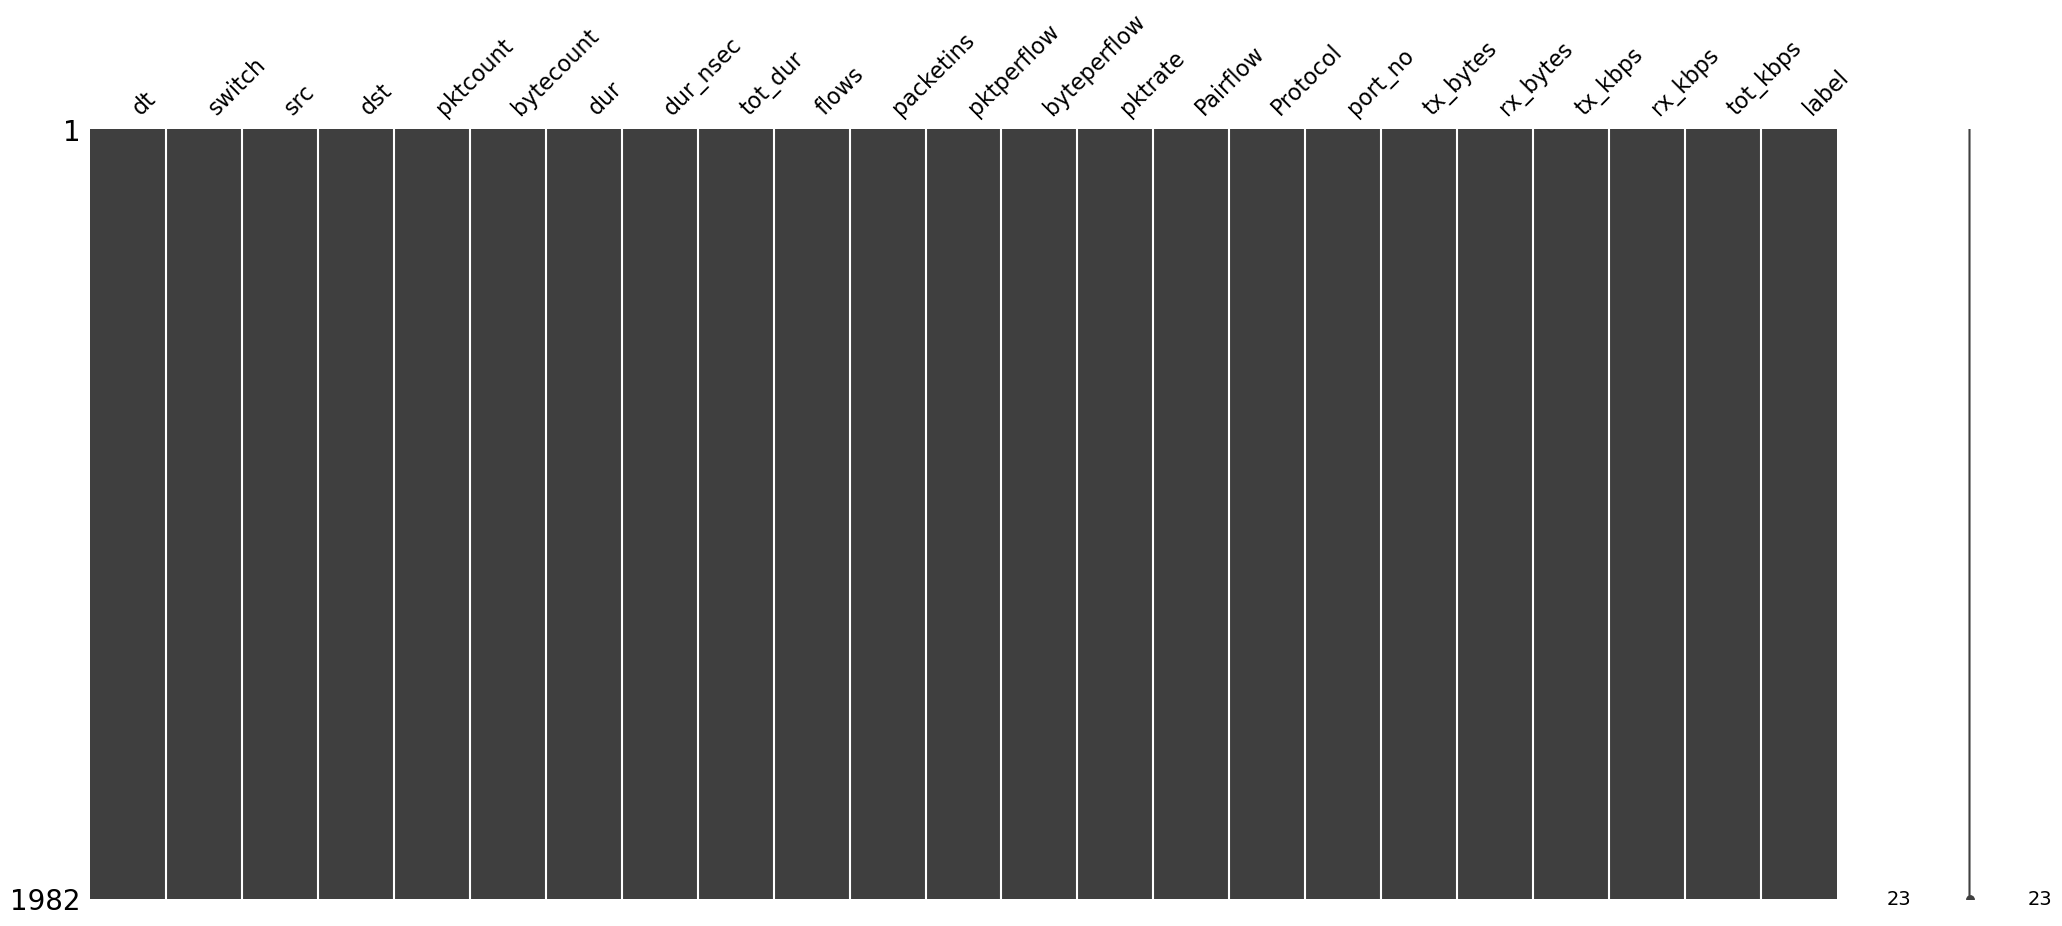

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

# Vẽ biểu đồ missing values
msno.matrix(df)

# Hiển thị biểu đồ (đảm bảo chỉ vẽ một lần)
plt.show()


#### Count of null values in each feature 

In [15]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [17]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.0
switch         0.0
src            0.0
dst            0.0
pktcount       0.0
bytecount      0.0
dur            0.0
dur_nsec       0.0
tot_dur        0.0
flows          0.0
packetins      0.0
pktperflow     0.0
byteperflow    0.0
pktrate        0.0
Pairflow       0.0
Protocol       0.0
port_no        0.0
tx_bytes       0.0
rx_bytes       0.0
tx_kbps        0.0
rx_kbps        0.0
tot_kbps       0.0
label          0.0
dtype: float64

#### Drop rows with null values

In [19]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [21]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 1982 rows and 23 columns after removing null values


#### Distribution of Target Class

In [23]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 37.39 %
Number of DDOS attacks that has not occured : 62.61 %


#### Barplot of Target Class

C:\Users\namtr\AppData\Local\Temp\ipykernel_26200\2522204883.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100


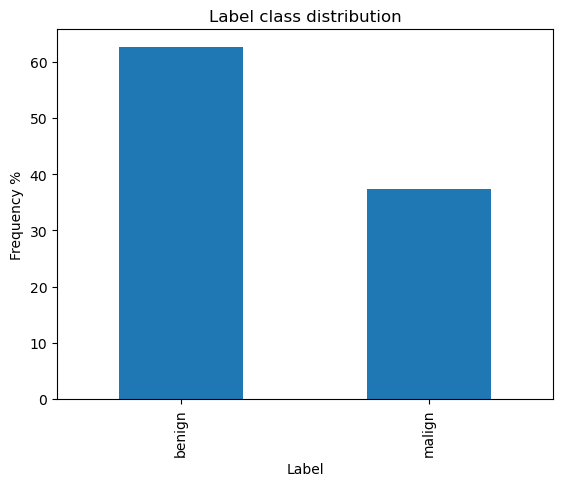

In [25]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")
plt.show()

#### Pairplot of select features

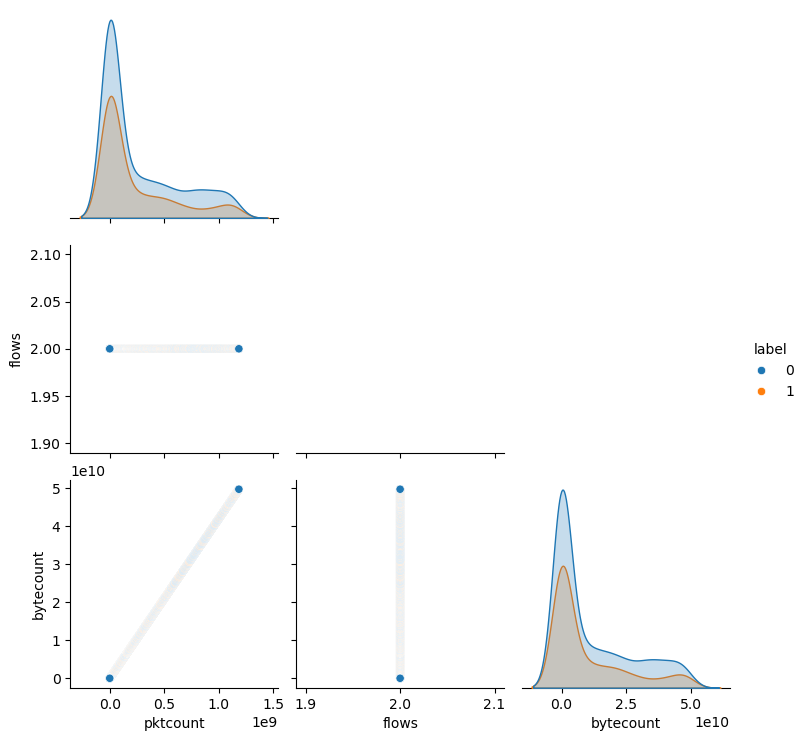

In [27]:
sns.pairplot(df, hue="label", vars=['pktcount', 'flows', 'bytecount'], corner=True)
plt.show()

#### Columns in the dataset

In [29]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [33]:
print(df.apply(lambda col: col.unique()))

dt             [1744306819, 1744306824, 1744306829, 174430683...
switch                                                       [1]
src            [10.0.0.5, 10.0.0.8, 10.0.0.1, 10.0.0.3, 10.0....
dst            [10.0.0.2, 10.0.0.7, 10.0.0.5, 10.0.0.4, 10.0....
pktcount       [18, 10, 38, 58, 74, 94, 101, 215994, 120, 108...
bytecount      [1764, 420, 3724, 1820, 5684, 2660, 7252, 3332...
dur            [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59,...
dur_nsec       [4000000, 7000000, 10000000, 13000000, 1400000...
tot_dur        [4004000000.0, 9007000000.0, 14010000000.0, 19...
flows                                                        [2]
packetins                                                    [0]
pktperflow     [9, 5, 19, 29, 37, 47, 50, 107997, 60, 544030,...
byteperflow    [882, 210, 1862, 910, 2842, 1330, 3626, 1666, ...
pktrate        [4, 2, 3, 7448, 32001, 50290, 63213, 74427, 84...
Pairflow                                                     [0]
Protocol                 

#### Numerical Features

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [37]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [39]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt              991
switch            1
pktcount       1753
bytecount      1756
dur             991
dur_nsec        669
tot_dur        1003
flows             1
packetins         1
pktperflow     1751
byteperflow    1756
pktrate         982
Pairflow          1
port_no           4
tx_bytes       1962
rx_bytes       1957
tx_kbps        1783
rx_kbps        1957
tot_kbps       1977
label             2
dtype: int64

#### Discrete numerical features

In [41]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 5 and they are : 
 ['switch', 'flows', 'packetins', 'Pairflow', 'port_no']


In [43]:
df[discrete_feature].head(10)

,switch,flows,packetins,Pairflow,port_no
0,1,2,0,0,3
1,1,2,0,0,4
2,1,2,0,0,4
3,1,2,0,0,2
4,1,2,0,0,2
5,1,2,0,0,3
6,1,2,0,0,2
7,1,2,0,0,1
8,1,2,0,0,2
9,1,2,0,0,3


#### Continuous features

In [45]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 14 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [47]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

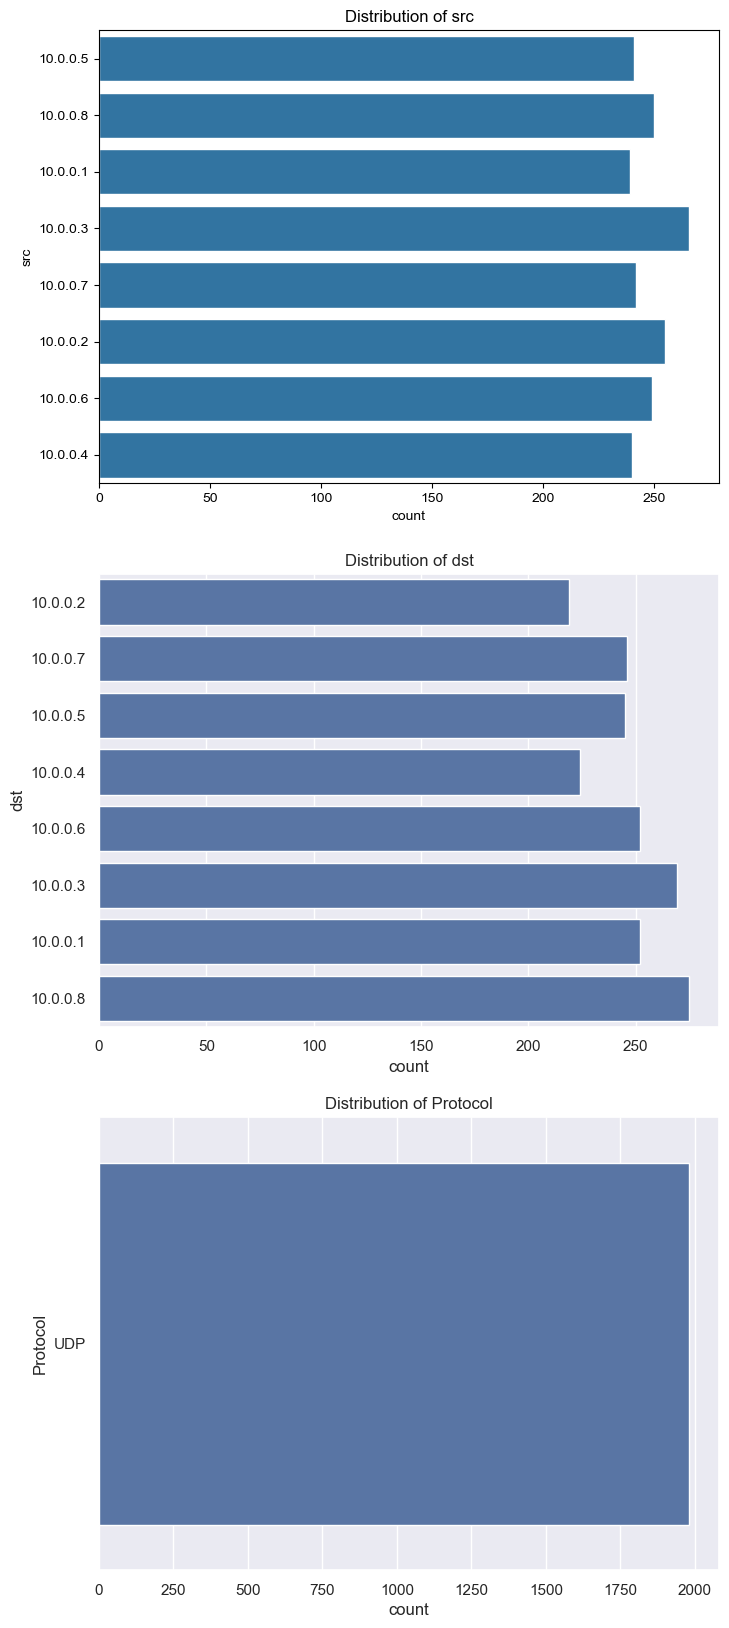

In [49]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

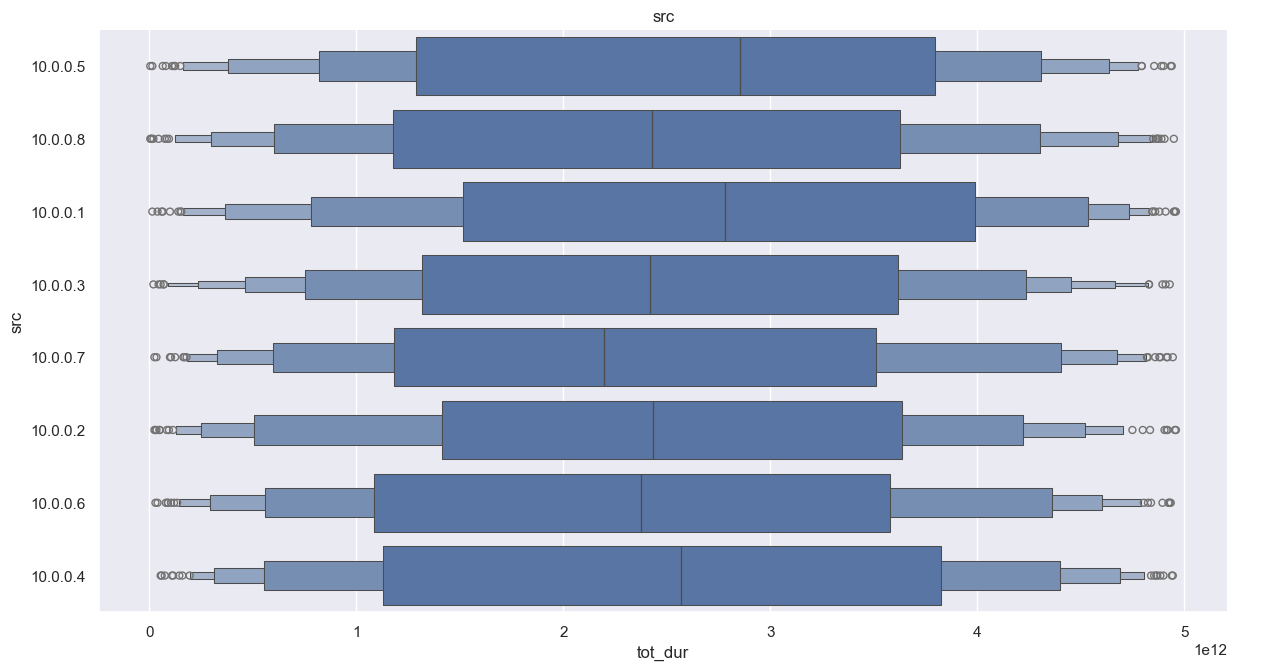

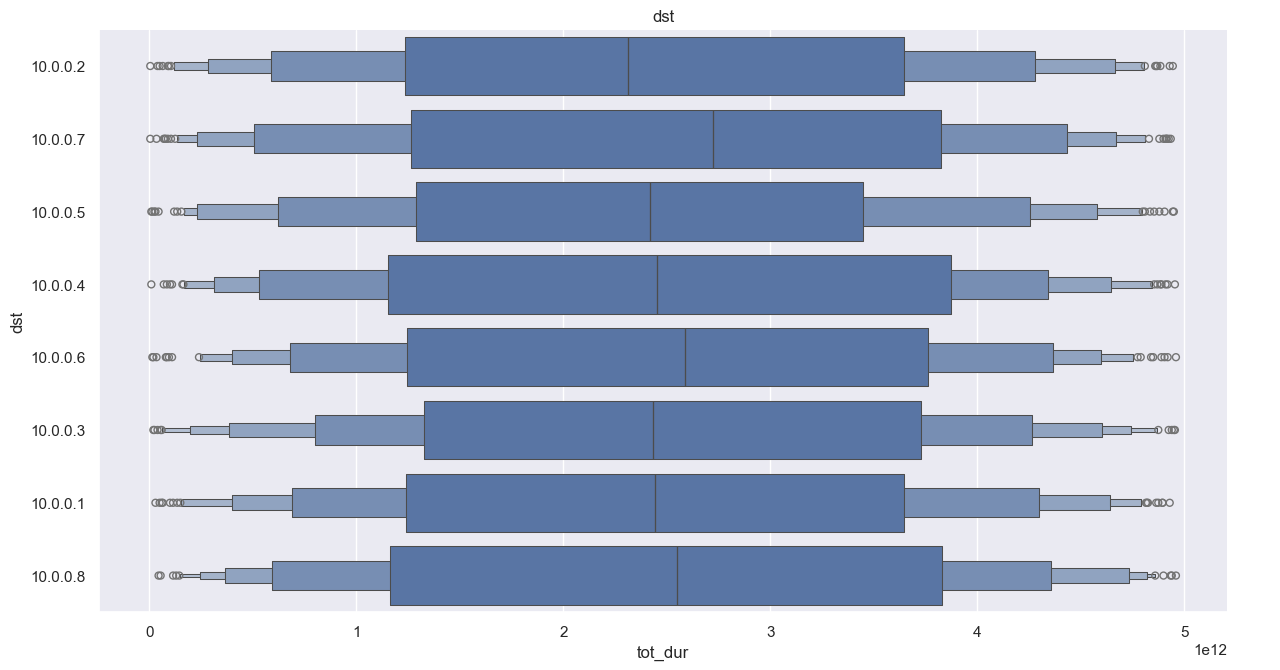

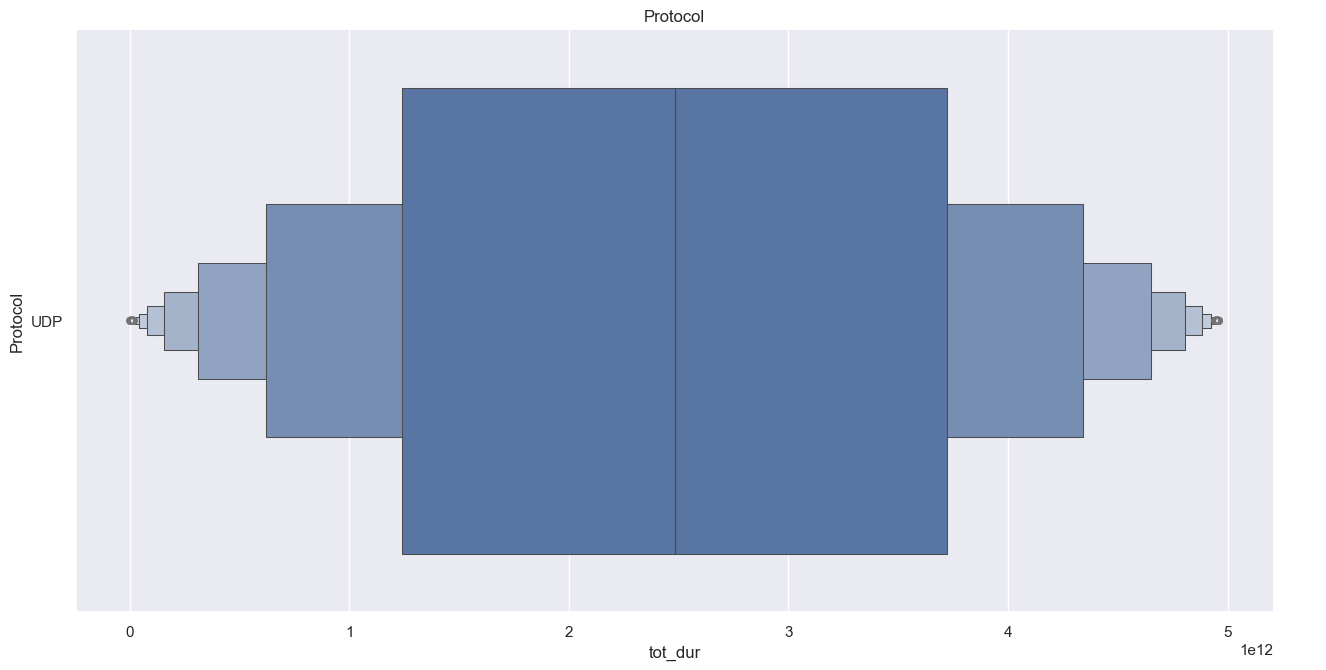

In [51]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df, x="tot_dur", y=categorical_features[i], kind="boxen")
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)
    g.set(title=categorical_features[i])
    
plt.show()  # Chỉ gọi plt.show() một lần sau vòng lặp


#### Visualize the distribution of continuous features

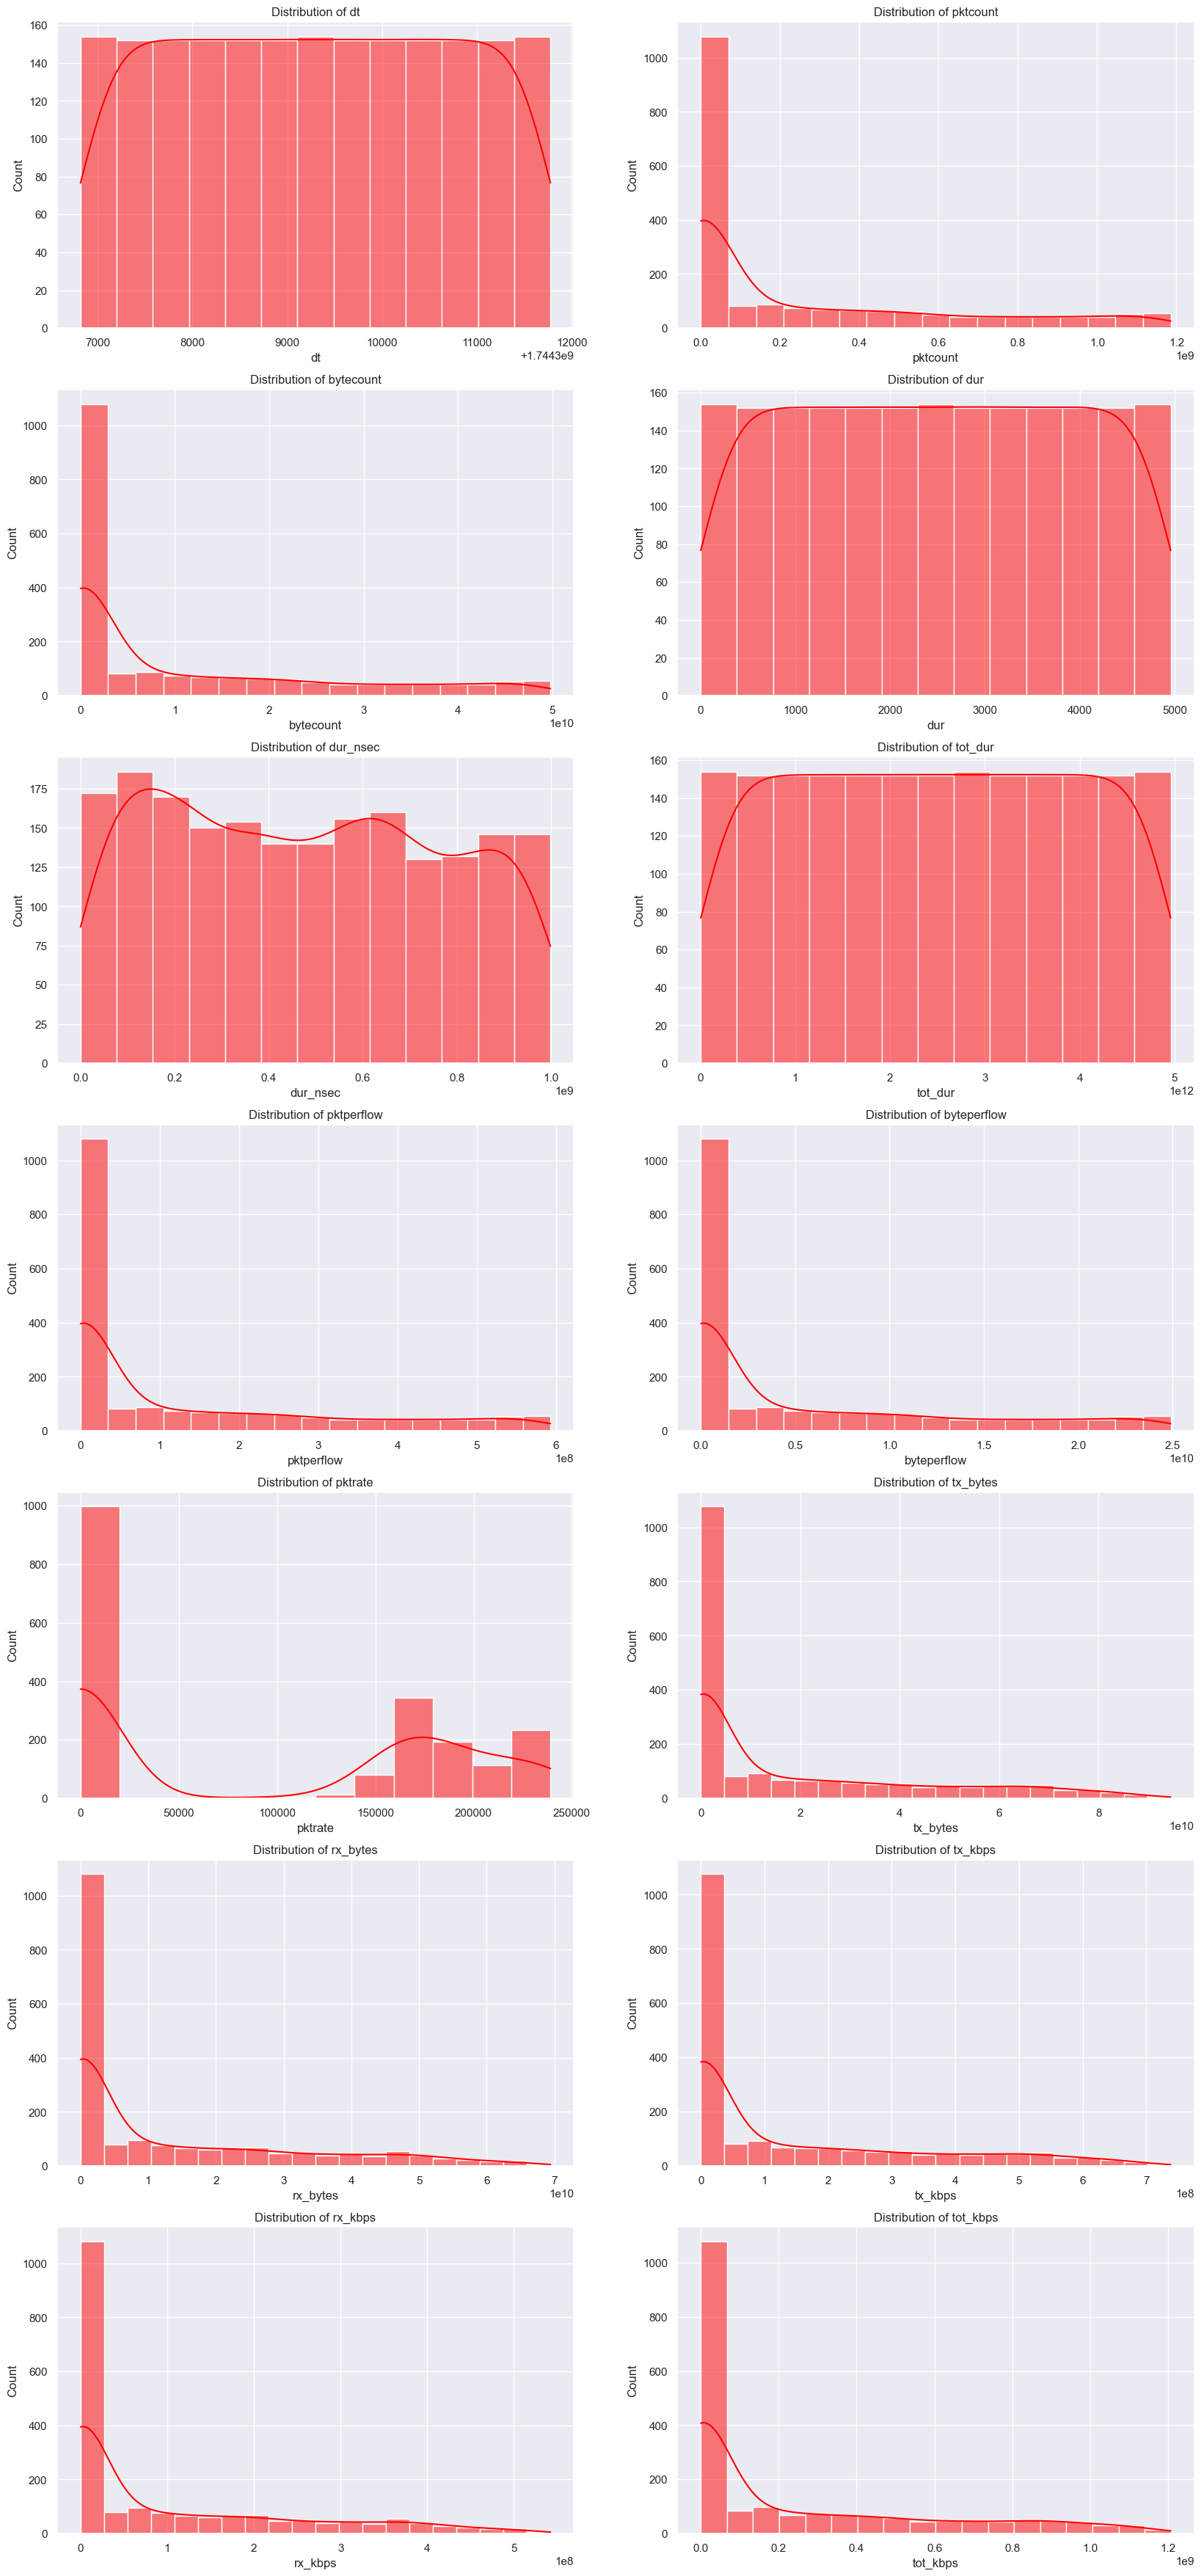

In [53]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

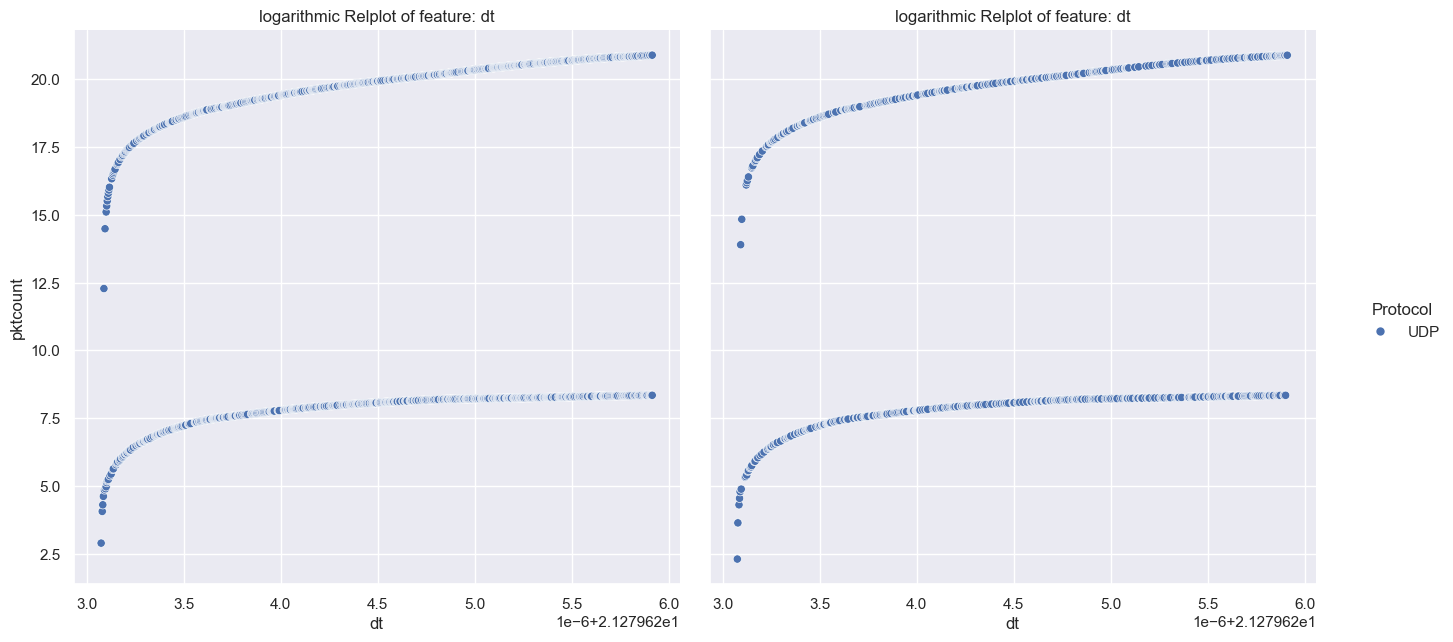

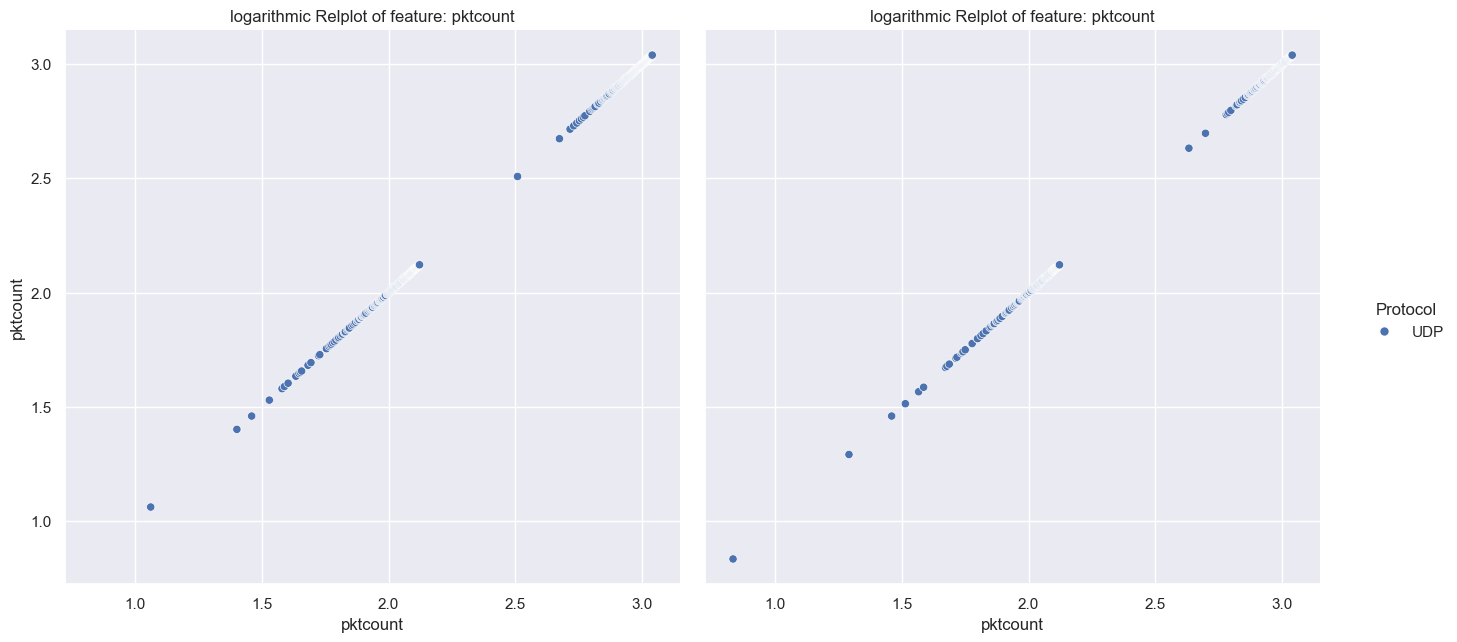

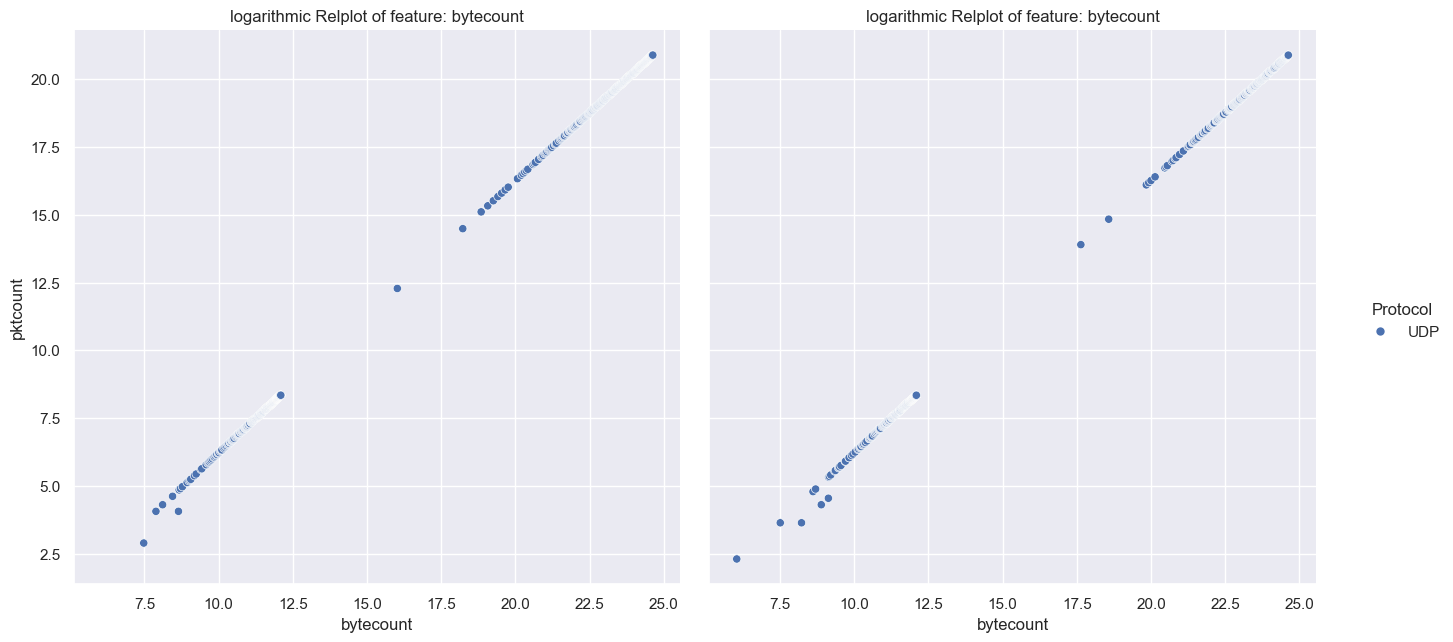

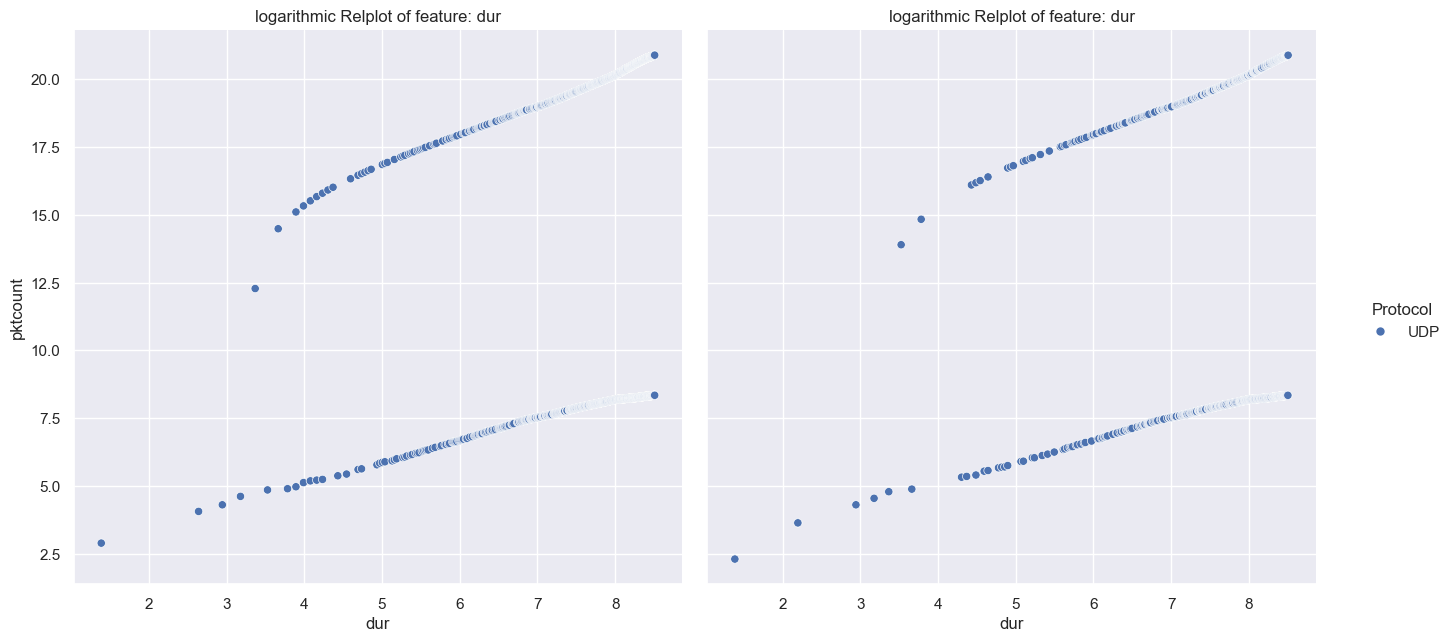

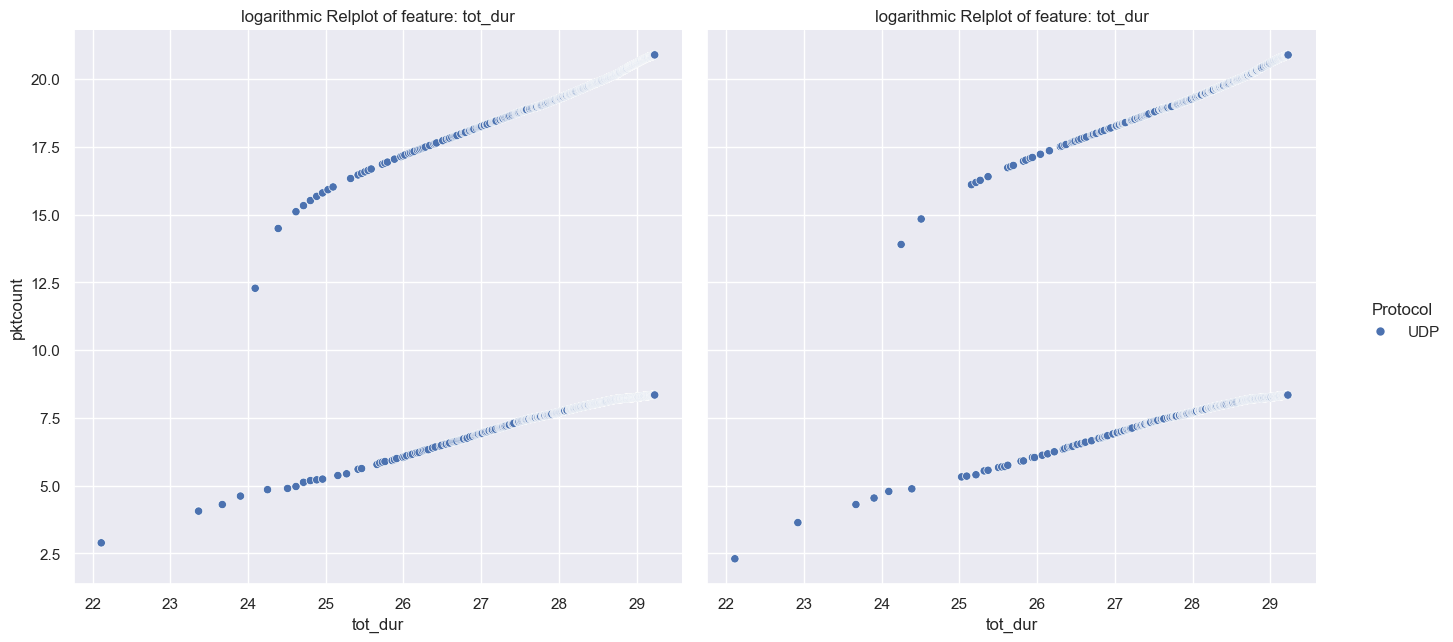

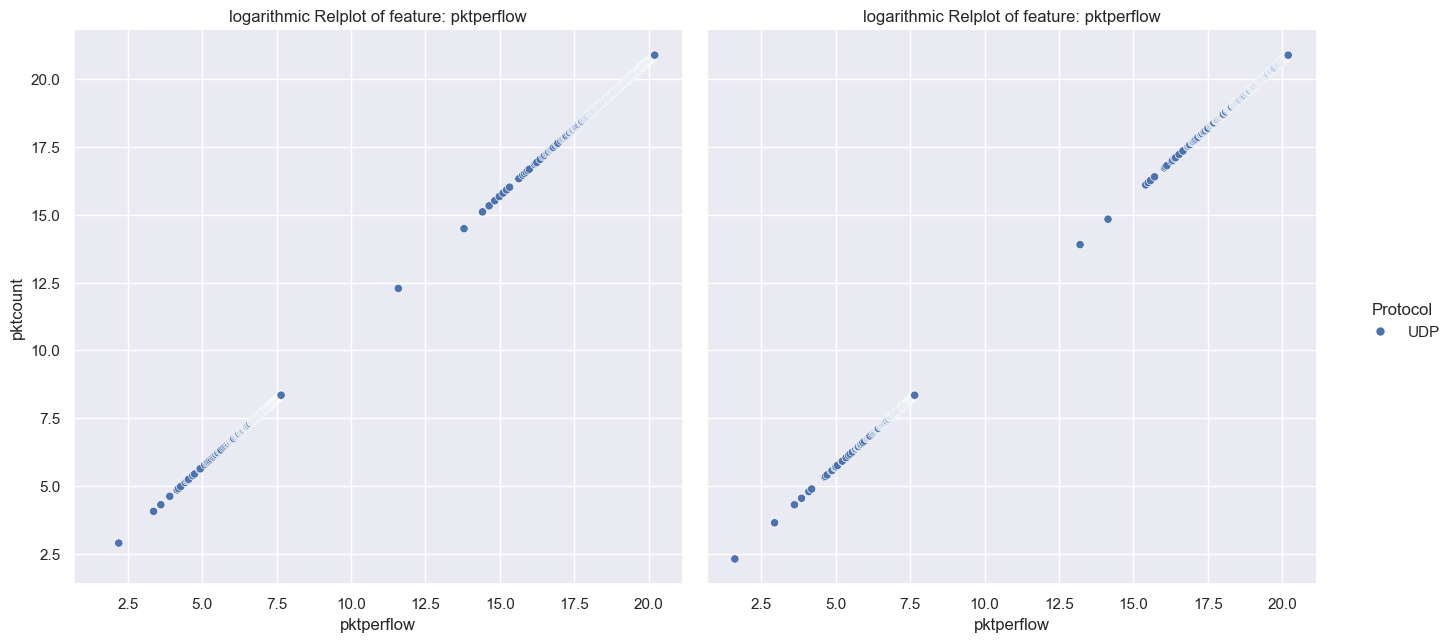

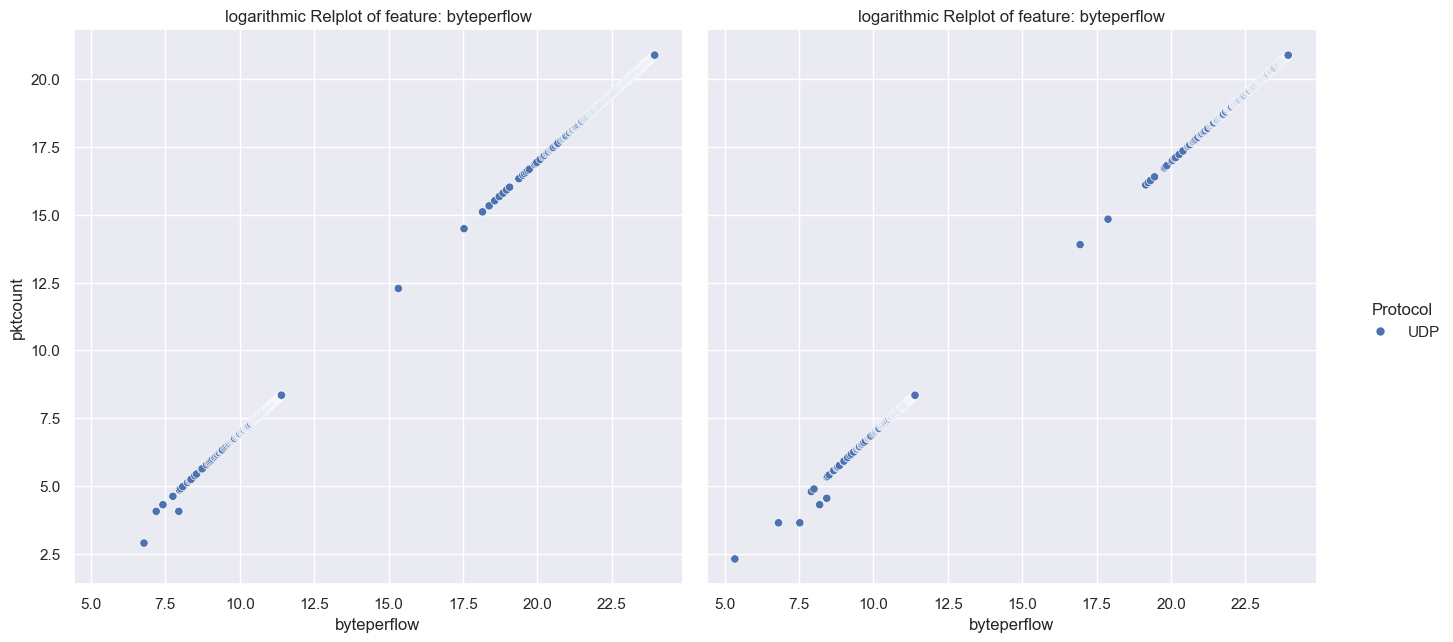

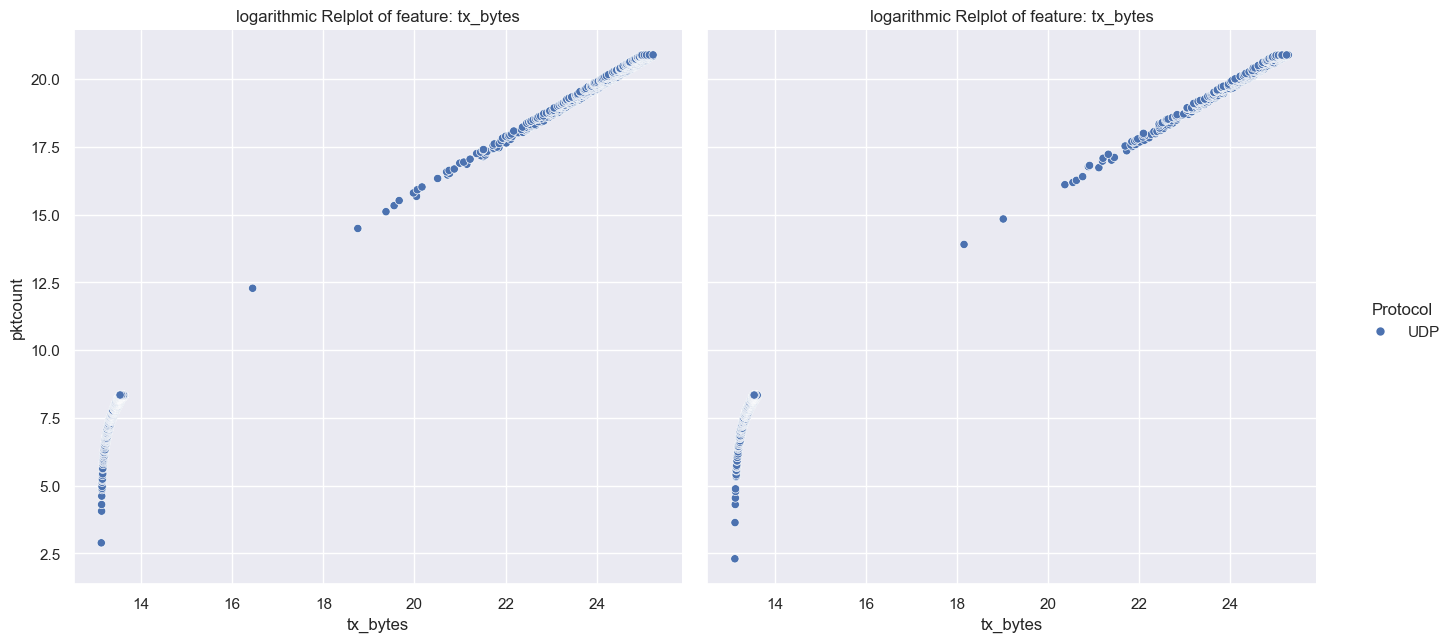

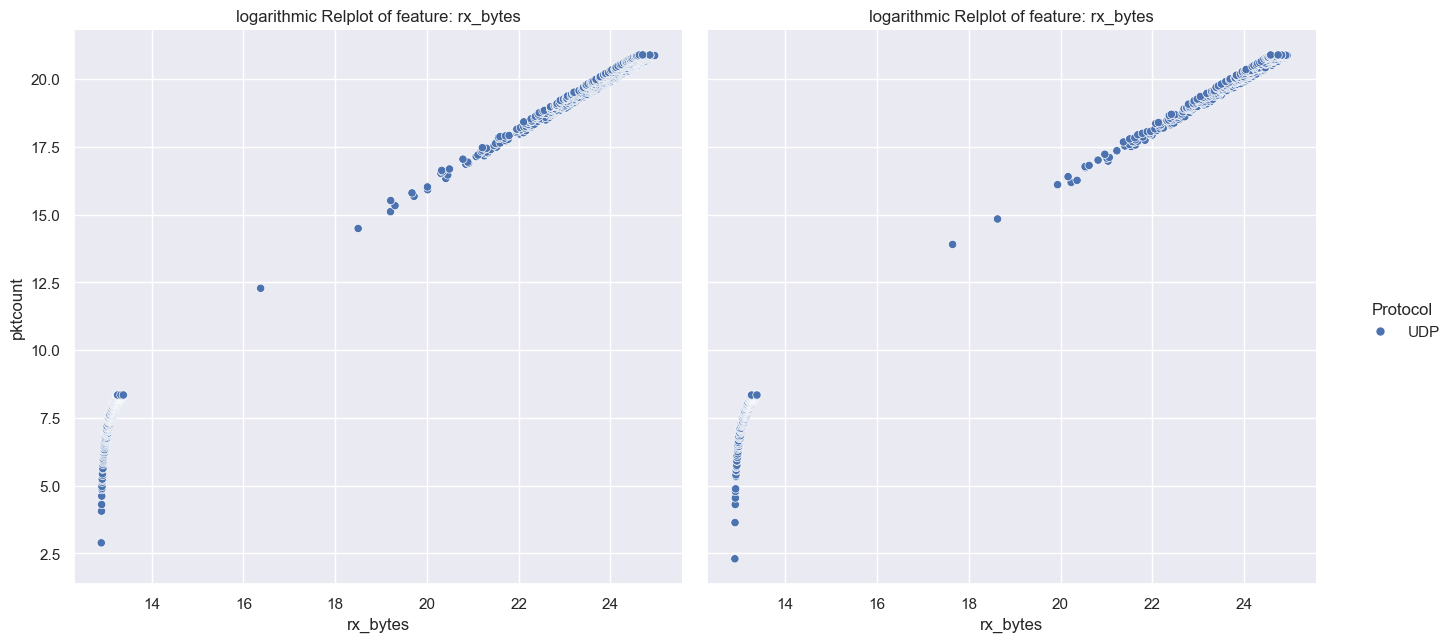

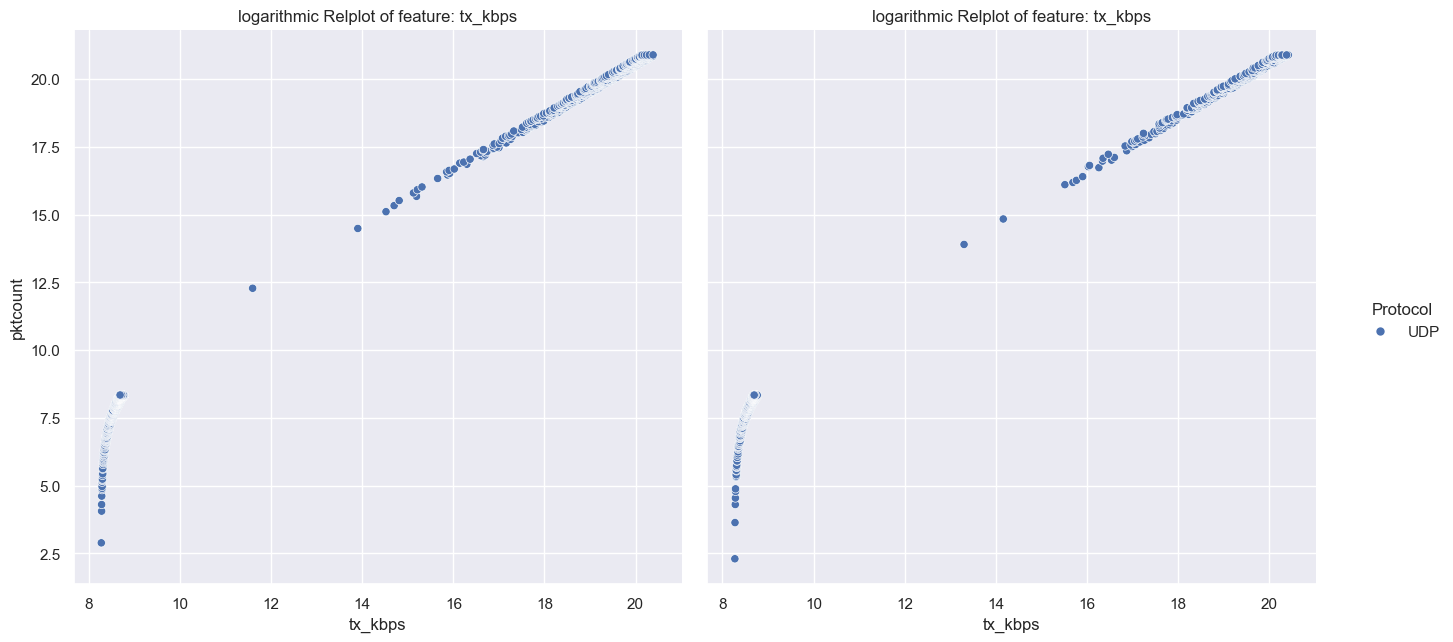

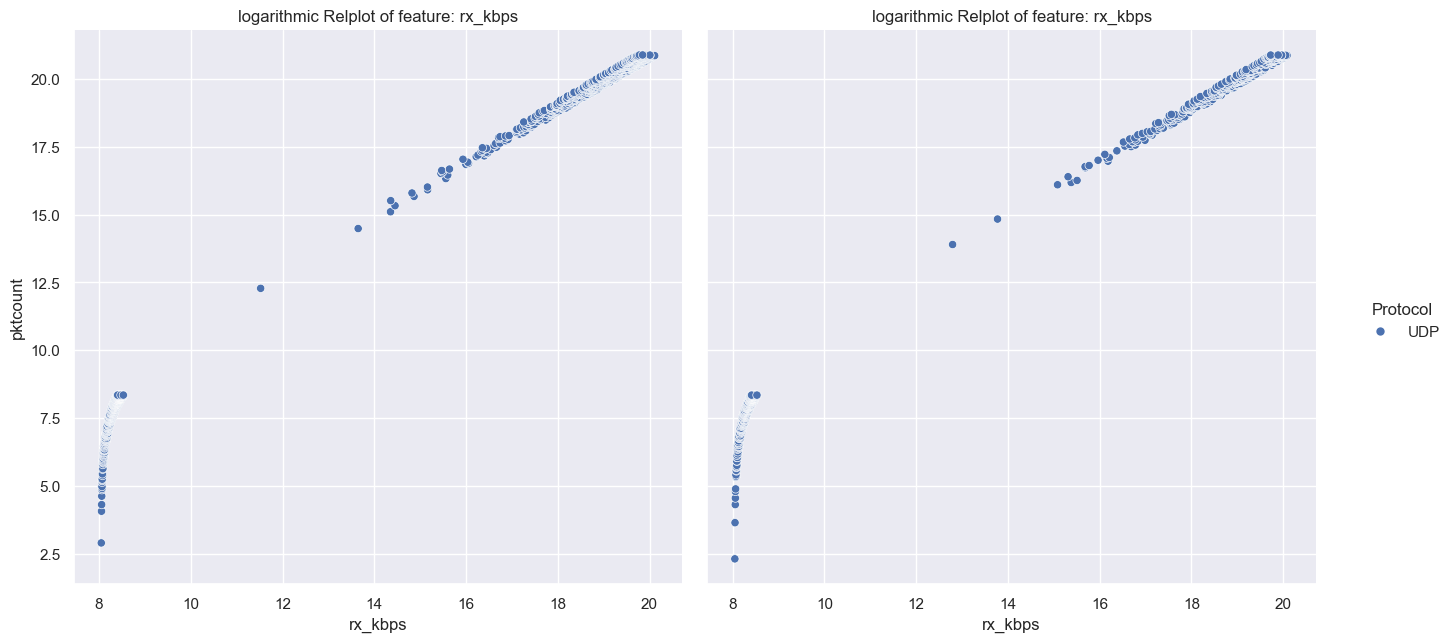

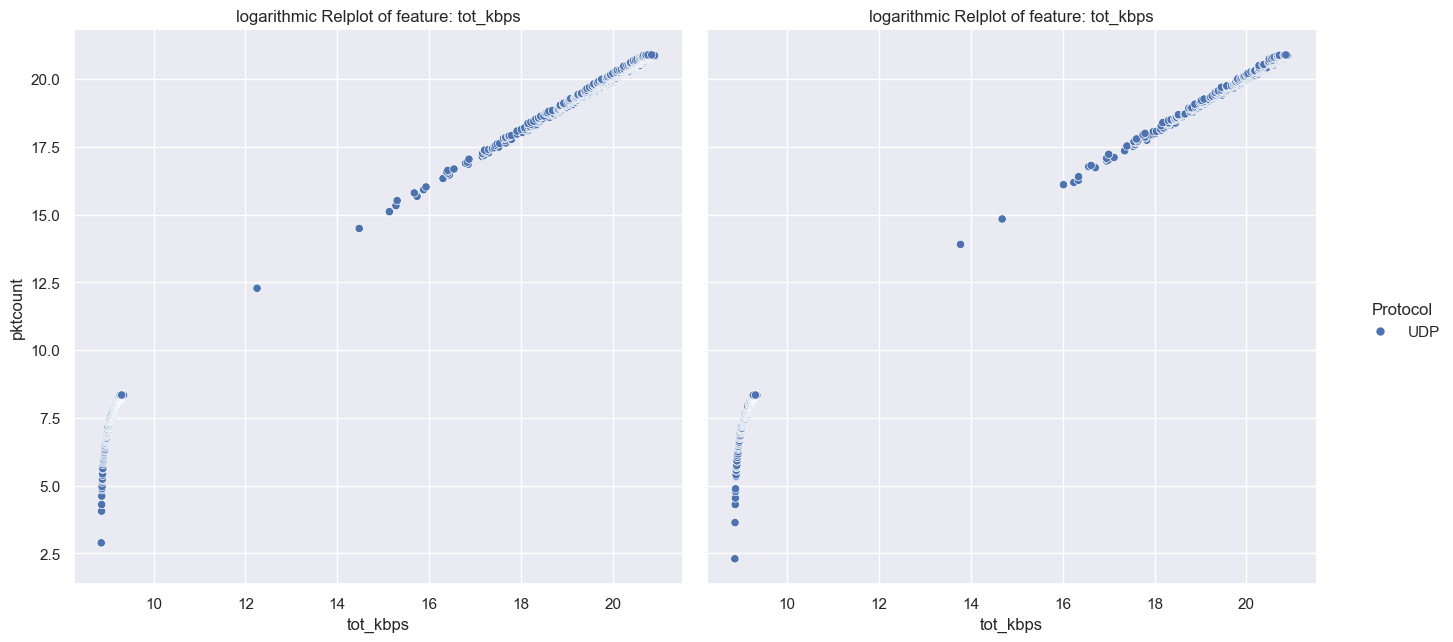

In [55]:
import warnings
warnings.filterwarnings("ignore")

for feature in continuous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        continue  # Bỏ qua nếu có giá trị 0 trong feature
    else:
        data[feature] = np.log(data[feature])
        data["pktcount"] = np.log(data["pktcount"])

        g = sns.relplot(
            data=data, x=feature, y="pktcount", hue="Protocol", style="Protocol",
            col="label", kind="scatter"
        )
        g.set(title=f"logarithmic Relplot of feature: {feature}")
        g.fig.set_figheight(7)
        g.fig.set_figwidth(15)

plt.show()  # Gọi plt.show() một lần sau vòng lặp


#### Visualize the distribution of numerical discrete features

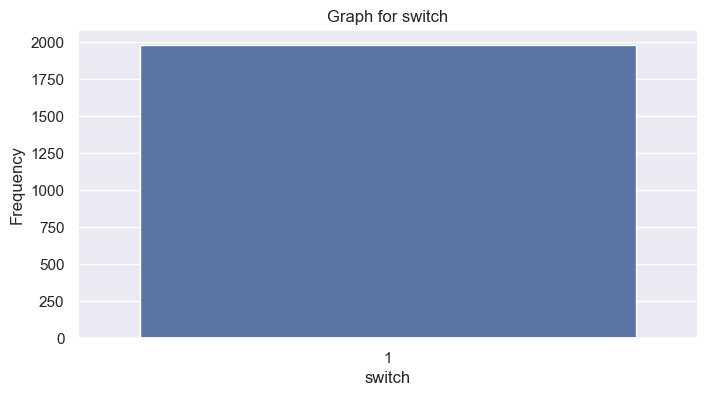

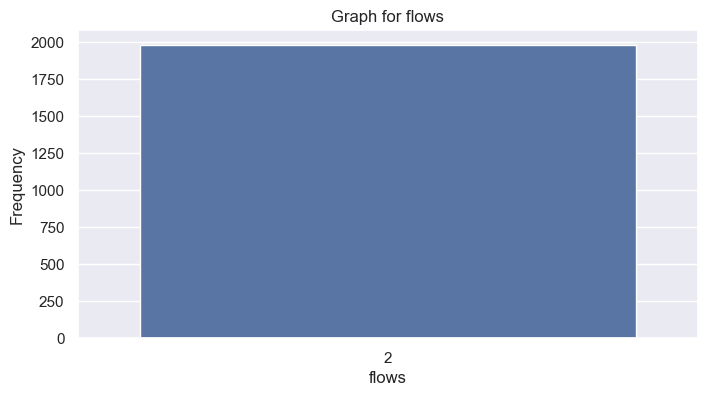

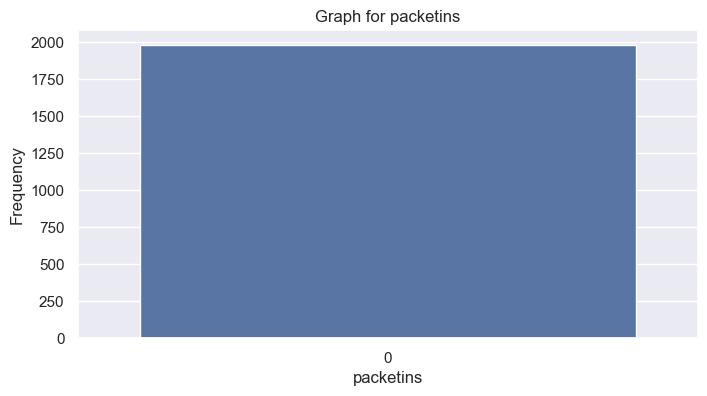

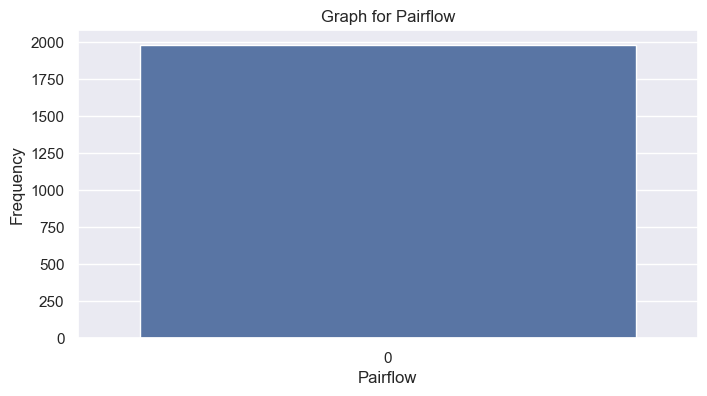

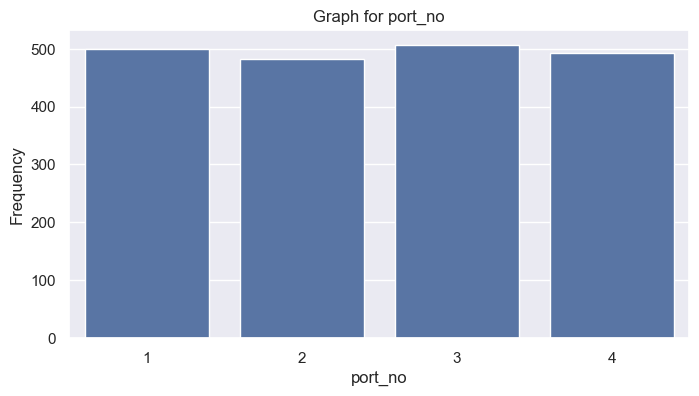

In [57]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [59]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

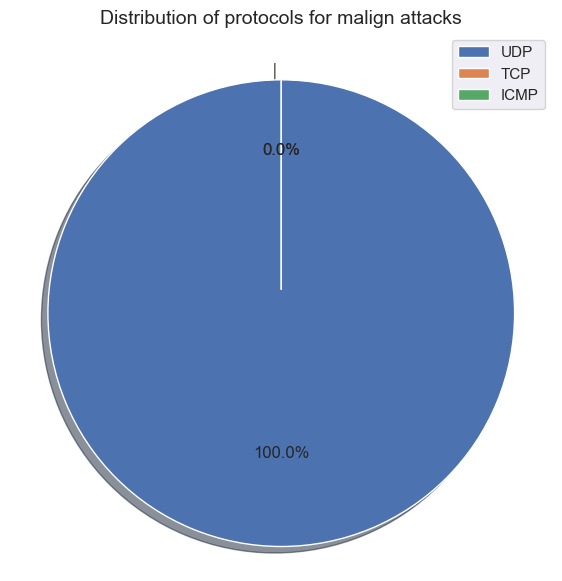

In [61]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

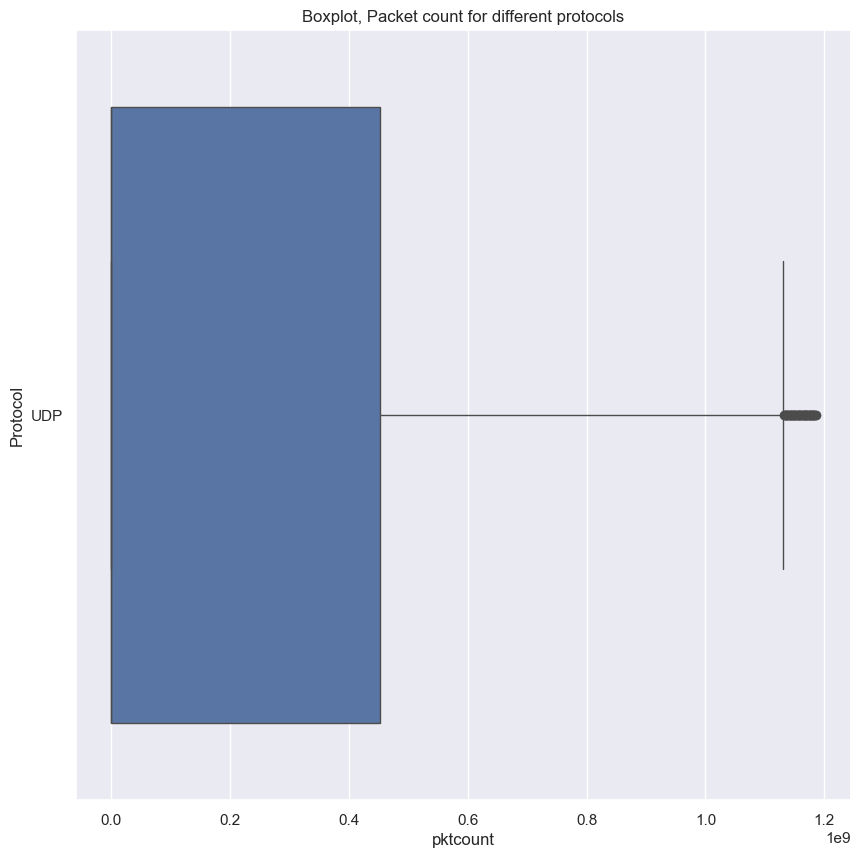

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

# Vẽ boxplot trên axes cụ thể
sns.boxplot(data=df, x="pktcount", y="Protocol", ax=ax)

# Đặt tiêu đề
ax.set_title("Boxplot, Packet count for different protocols")

# Hiển thị hình vẽ
plt.show()

#### Heat map of correlation of features

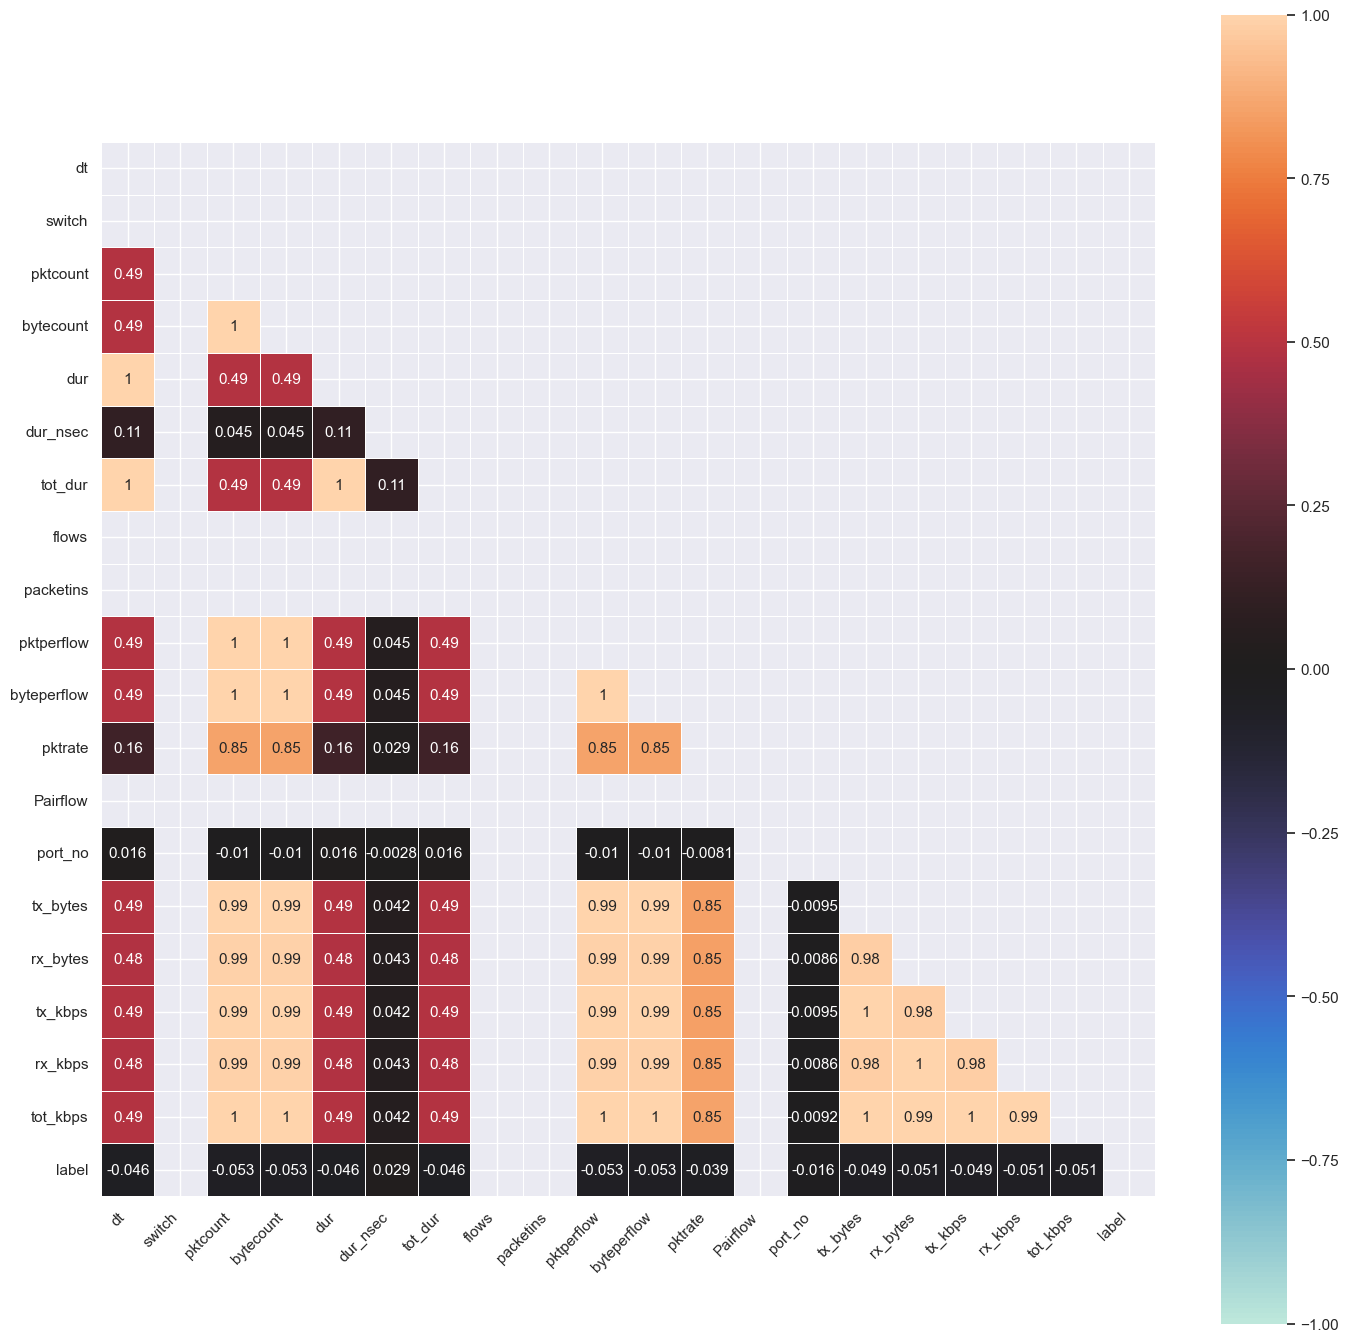

In [65]:
# Chỉ lấy cột số
df_numeric = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan
correlation_matrix = df_numeric.corr()

# Tạo mask để che phần tam giác trên
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Cấu hình hiển thị
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(17, 17))

# Vẽ heatmap
sns.heatmap(
    correlation_matrix, mask=mask, square=True, annot=True, center=0,
    vmin=-1, linewidths=0.5, annot_kws={"size": 11}, ax=ax
)

# Căn chỉnh nhãn trục x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Hiển thị biểu đồ
plt.show()

In [67]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [69]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 1982 rows and 34 columns after encoding


In [71]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,src_10.0.0.6,src_10.0.0.7,src_10.0.0.8,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8
0,1744306819,1,18,1764,4,4000000,4.004000e+09,2,0,9,...,False,False,False,True,False,False,False,False,False,False
1,1744306819,1,10,420,4,4000000,4.004000e+09,2,0,5,...,False,False,True,False,False,False,False,False,True,False
2,1744306824,1,38,3724,9,7000000,9.007000e+09,2,0,19,...,False,False,True,False,False,False,True,False,False,False
3,1744306824,1,38,1820,9,7000000,9.007000e+09,2,0,19,...,False,False,True,False,False,True,False,False,False,False
4,1744306829,1,58,5684,14,10000000,1.401000e+10,2,0,29,...,False,False,False,False,False,False,False,True,False,False
5,1744306829,1,58,2660,14,10000000,1.401000e+10,2,0,29,...,False,False,False,False,False,False,True,False,False,False
6,1744306834,1,74,7252,19,13000000,1.901300e+10,2,0,37,...,False,False,True,False,True,False,False,False,False,False
7,1744306834,1,74,3332,19,13000000,1.901300e+10,2,0,37,...,False,False,False,False,False,False,False,True,False,False
8,1744306839,1,94,9212,24,14000000,2.401400e+10,2,0,47,...,False,True,False,False,False,False,True,False,False,False
9,1744306839,1,101,4662,24,14000000,2.401400e+10,2,0,50,...,False,False,False,False,True,False,False,False,False,False


In [73]:
df.dtypes

dt                int64
switch            int64
pktcount          int64
bytecount         int64
dur               int64
dur_nsec          int64
tot_dur         float64
flows             int64
packetins         int64
pktperflow        int64
byteperflow       int64
pktrate           int64
Pairflow          int64
port_no           int64
tx_bytes          int64
rx_bytes          int64
tx_kbps           int64
rx_kbps         float64
tot_kbps        float64
label             int64
src_10.0.0.2       bool
src_10.0.0.3       bool
src_10.0.0.4       bool
src_10.0.0.5       bool
src_10.0.0.6       bool
src_10.0.0.7       bool
src_10.0.0.8       bool
dst_10.0.0.2       bool
dst_10.0.0.3       bool
dst_10.0.0.4       bool
dst_10.0.0.5       bool
dst_10.0.0.6       bool
dst_10.0.0.7       bool
dst_10.0.0.8       bool
dtype: object

### Split into Independent and dependent variables

In [75]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [77]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(1387, 33) (595, 33)


## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [93]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [99]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28, input_shape=(33,), activation="relu", name="Hidden_Layer_1"))  # sửa 56 -> 33
model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
model.add(Dense(1, activation="sigmoid", name="Output_Layer"))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │             952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,253 (4.89 KB)

 Trainable params: 1,253 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

## Model fitting 

In [101]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
44/44 - 2s - 48ms/step - accuracy: 0.8601 - loss: 0.3237 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 2/100
44/44 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 6.9815e-04
Epoch 3/100
44/44 - 0s - 5ms/step - accuracy: 1.0000 - loss: 3.8692e-04 - val_accuracy: 1.0000 - val_loss: 3.9340e-04
Epoch 4/100
44/44 - 0s - 4ms/step - accuracy: 1.0000 - loss: 2.4608e-04 - val_accuracy: 1.0000 - val_loss: 2.6525e-04
Epoch 5/100
44/44 - 0s - 5ms/step - accuracy: 1.0000 - loss: 1.6642e-04 - val_accuracy: 1.0000 - val_loss: 1.8528e-04
Epoch 6/100
44/44 - 0s - 6ms/step - accuracy: 1.0000 - loss: 1.1654e-04 - val_accuracy: 1.0000 - val_loss: 1.3915e-04
Epoch 7/100
44/44 - 0s - 5ms/step - accuracy: 1.0000 - loss: 8.6409e-05 - val_accuracy: 1.0000 - val_loss: 1.0880e-04
Epoch 8/100
44/44 - 0s - 8ms/step - accuracy: 1.0000 - loss: 6.6652e-05 - val_accuracy: 1.0000 - val_loss: 8.6641e-05
Epoch 9/100
44/44 - 0s - 8ms/step - accuracy: 1.0000 - loss: 5.2683

## Plotting Loss v/s Epochs 

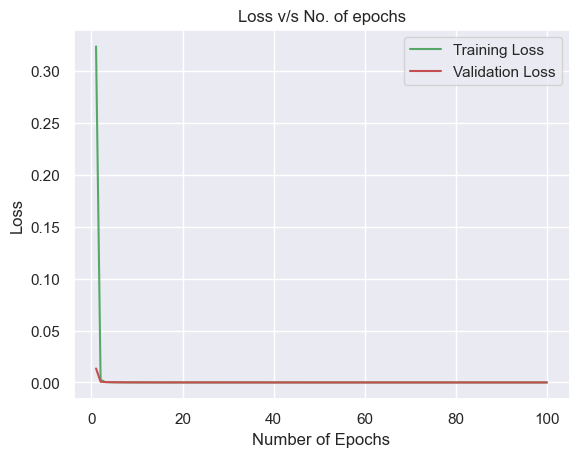

In [103]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

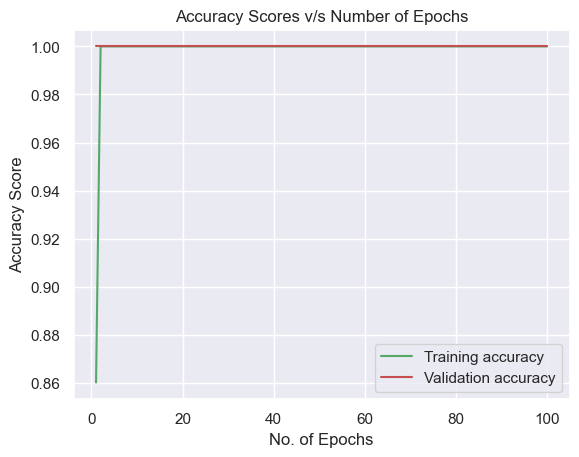

In [105]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [107]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.5735e-07 
Accuracy of Deep neural Network : 100.00


#### K-Nearest Neighbor Classifier

In [109]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 99.66


#### SVM Classifier

In [111]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 100.00


#### Decision Tree Classifier

In [113]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 100.00


#### Naive Bayes Classifier

In [123]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy * 100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy * 100))

Accuracy of Naive Bayes Classifier : 86.55


#### Quadratic Discriminant Analysis Classifier

In [125]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

Accuracy of QDA Classifier : 100.00


#### Stochastic Gradient Classifier

In [127]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 100.00


#### Logistic Regression 

In [129]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 100.00


#### XGBoost Classifier

In [131]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

Accuracy of XGBoost Classifier : 100.00


### Comparitive analysis of models

In [133]:
Classifier_names = ["DNN", "KNN", "RBF_SVM", "Decision Tree","Naive Bayes","Quadratic","SGD","Logistic Regression","XGBoost"]

In [135]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
0,DNN,100.000000
2,RBF_SVM,100.000000
3,Decision Tree,100.000000
5,Quadratic,100.000000
6,SGD,100.000000
7,Logistic Regression,100.000000
8,XGBoost,100.000000
1,KNN,99.663866
4,Naive Bayes,86.554622


#### Visualize accuracies of the models

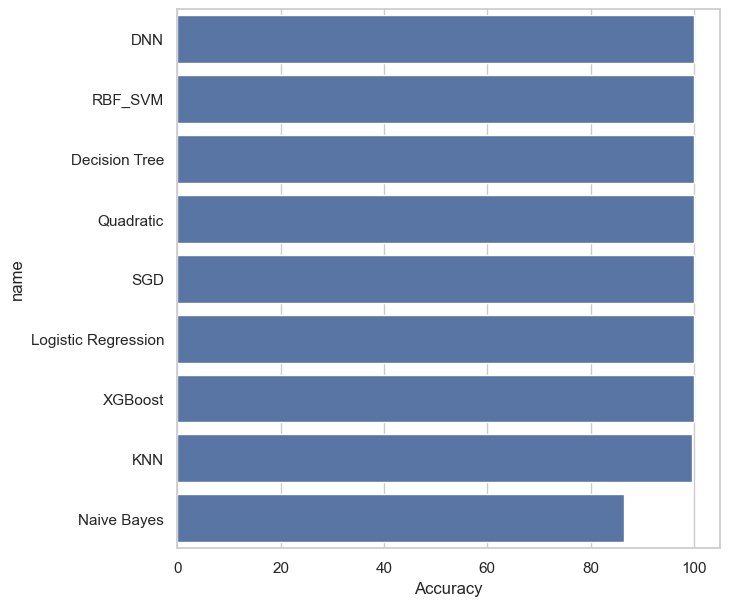

In [137]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)
plt.show()

In [139]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN with an accuracy of 100.0.


## Hyperparameter tuning 

In [153]:
def model_builder(hp):
    model = keras.Sequential()
    
    # 🛠 Sửa input_shape từ 56 -> 33 (số đặc trưng thực tế)
    model.add(Dense(28, input_shape=(33,), activation="relu", name="Hidden_Layer_1"))
    model.add(Dense(10, activation="relu", name="Hidden_Layer_2"))
    model.add(Dense(1, activation="sigmoid", name="Output_Layer"))
    
    # Sử dụng learning_rate từ hyperparameter
    opt = keras.optimizers.Adam(
        learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    )
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [155]:
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=2, directory='ddos', project_name='ddos_isa', overwrite=True)

In [157]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [159]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test,y_test), batch_size = 32)

Trial 3 Complete [00h 00m 59s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 48s


In [161]:
tuner.results_summary()

Results summary
Results in ddos\ddos_isa
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
learning_rate: 0.0001
Score: 1.0

Trial 1 summary
Hyperparameters:
learning_rate: 0.001
Score: 1.0

Trial 2 summary
Hyperparameters:
learning_rate: 0.01
Score: 1.0


## Best Hyperparameters 

In [163]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.0001}

## Model Evaluation

In [165]:
loss, accuracy = modified_model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2294  


## Get Best value for epoch 

In [167]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5393 - loss: 0.6918 - val_accuracy: 0.6370 - val_loss: 0.6818
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 0.6755 - val_accuracy: 0.7059 - val_loss: 0.6620
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7107 - loss: 0.6587 - val_accuracy: 0.7294 - val_loss: 0.6465
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7116 - loss: 0.6472 - val_accuracy: 0.7277 - val_loss: 0.6326
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7181 - loss: 0.6327 - val_accuracy: 0.7277 - val_loss: 0.6199
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7030 - loss: 0.6246 - val_accuracy: 0.7311 - val_loss: 0.6078
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7290 - loss: 0.6040 - val_accuracy: 0.7412 - val_loss: 0.5964
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7231 - loss: 0.5996 - val_accuracy: 0.7546 - v

## Plot of Loss v/s Epochs for hypermodel

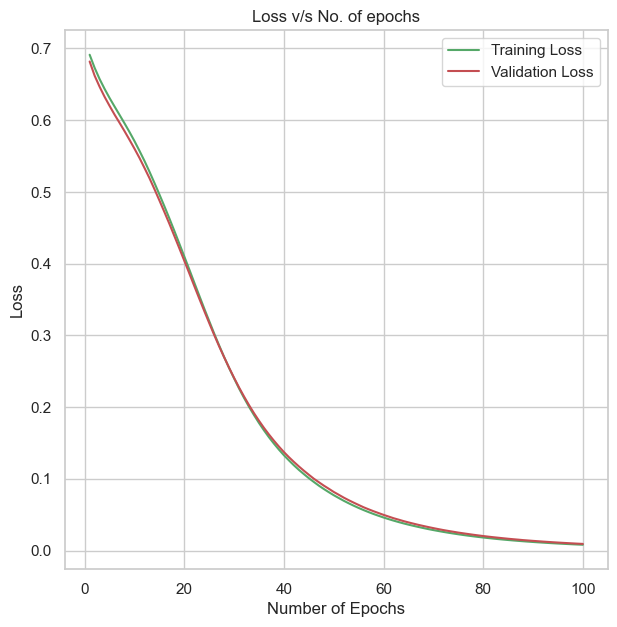

In [169]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot for Accuracy v/s Epochs for hypermodel

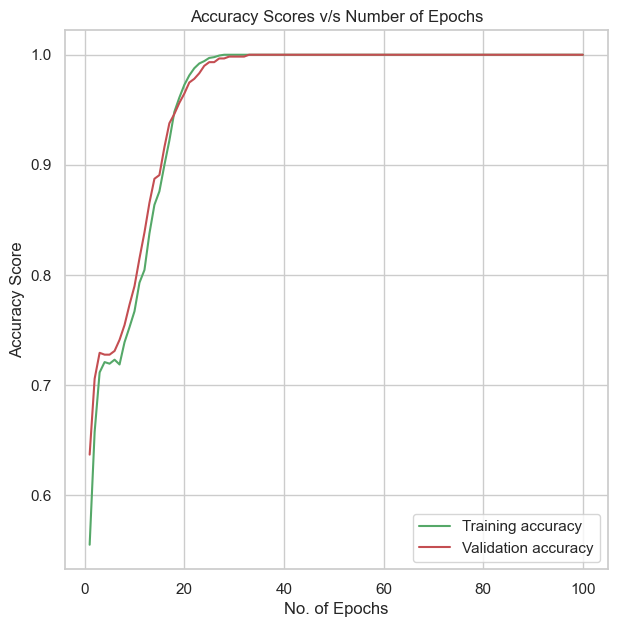

In [171]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Final Model 

In [173]:
hypermodel = tuner.hypermodel.build(modified_hparam)

## Fitting the hypermodel 

In [175]:
hypermodel.fit(X_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(X_test, y_test), initial_epoch=0)

Epoch 1/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4371 - loss: 0.7014 - val_accuracy: 0.4958 - val_loss: 0.6886
Epoch 2/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4977 - loss: 0.6926 - val_accuracy: 0.5613 - val_loss: 0.6797
Epoch 3/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5665 - loss: 0.6822 - val_accuracy: 0.6050 - val_loss: 0.6705
Epoch 4/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5946 - loss: 0.6758 - val_accuracy: 0.6454 - val_loss: 0.6621
Epoch 5/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6117 - loss: 0.6737 - val_accuracy: 0.6622 - val_loss: 0.6536
Epoch 6/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6396 - loss: 0.6597 - val_accuracy: 0.6639 - val_loss: 0.6443
Epoch 7/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6459 - loss: 0.6474 - val_accuracy: 0.6622 - val_loss: 0.6343
Epoch 8/33
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6360 - loss: 0.6386 - val_accuracy: 0.6555 - val_loss:

In [177]:
hypermodel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │             952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,761 (14.70 KB)

 Trainable params: 1,253 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,508 (9.80 KB)

## Printing the final accuracy and loss values of the hypermodel 

In [179]:
result_final = hypermodel.evaluate(X_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.3152 
[Loss, Accuracy]: [0.3132992088794708, 0.9798319339752197]


## Making Sample Predictions 

In [181]:
classes = model.predict(X_test)
print(classes)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[1.60524100e-02]
 [8.87710825e-02]
 [9.89805520e-01]
 [9.91414309e-01]
 [8.66934061e-02]
 [3.33794802e-02]
 [1.63856591e-03]
 [7.32237985e-03]
 [2.43071263e-04]
 [7.06232488e-02]
 [2.74995007e-02]
 [8.88438779e-04]
 [9.94129241e-01]
 [1.52031574e-02]
 [1.02966130e-02]
 [9.96063292e-01]
 [9.89734650e-01]
 [9.91653621e-01]
 [1.46464128e-02]
 [1.61456643e-04]
 [9.94051516e-01]
 [8.54681770e-04]
 [3.71666509e-04]
 [9.89841223e-01]
 [9.94280815e-01]
 [9.92892325e-01]
 [1.64435953e-02]
 [4.78220219e-03]
 [9.93319094e-01]
 [4.13165009e-03]
 [9.90489423e-01]
 [2.48162751e-03]
 [7.48288076e-05]
 [1.60635577e-03]
 [9.94227529e-01]
 [4.81318086e-02]
 [5.20576839e-04]
 [9.94064212e-01]
 [9.93243933e-01]
 [3.26940715e-02]
 [9.83991623e-01]
 [1.22314354e-03]
 [6.84315513e-04]
 [1.74983020e-03]
 [9.86824811e-01]
 [2.12468449e-02]
 [6.26838475e-04]
 [3.13370340e-02]
 [5.83455549e-04]
 [9.85687673e-01]
 [1.84082921e-04]
 [6.64008956e-04]
 [1.43171777e-03]
 [4.377

In [183]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [185]:
y_pred[:20]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0]

In [187]:
y_test[:20]

1847    0
381     0
1040    1
618     1
650     0
1714    0
963     0
101     0
1370    0
660     0
1408    0
1811    0
556     1
1087    0
1779    0
1477    1
1182    1
1691    1
872     0
1757    0
Name: label, dtype: int64

## Classification Report 

In [189]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      1.00      1.00       384
      malign       1.00      1.00      1.00       211

    accuracy                           1.00       595
   macro avg       1.00      1.00      1.00       595
weighted avg       1.00      1.00      1.00       595



## Plotting Confusion Matrix

In [191]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

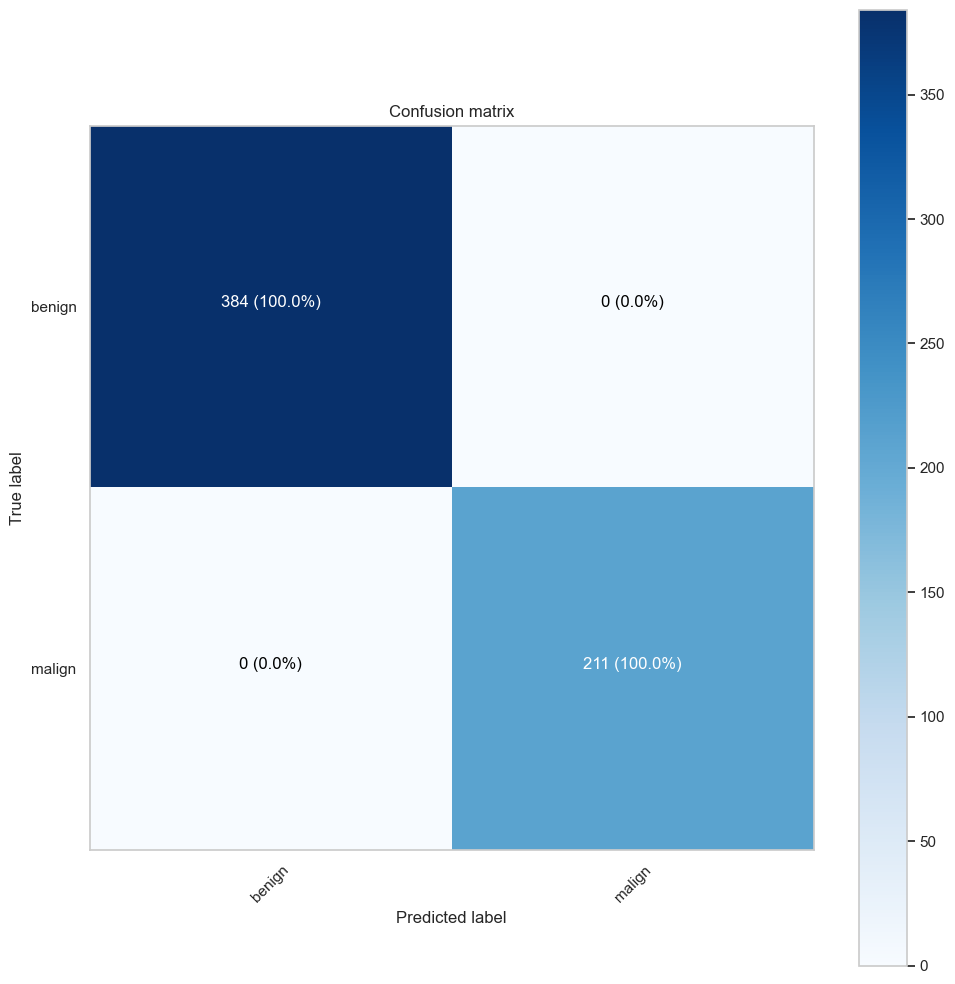

In [193]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)
plt.show()

## Displaying ROC-AUC curve

In [203]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(33,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

Area under the curve(AUC) is: 1.0


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

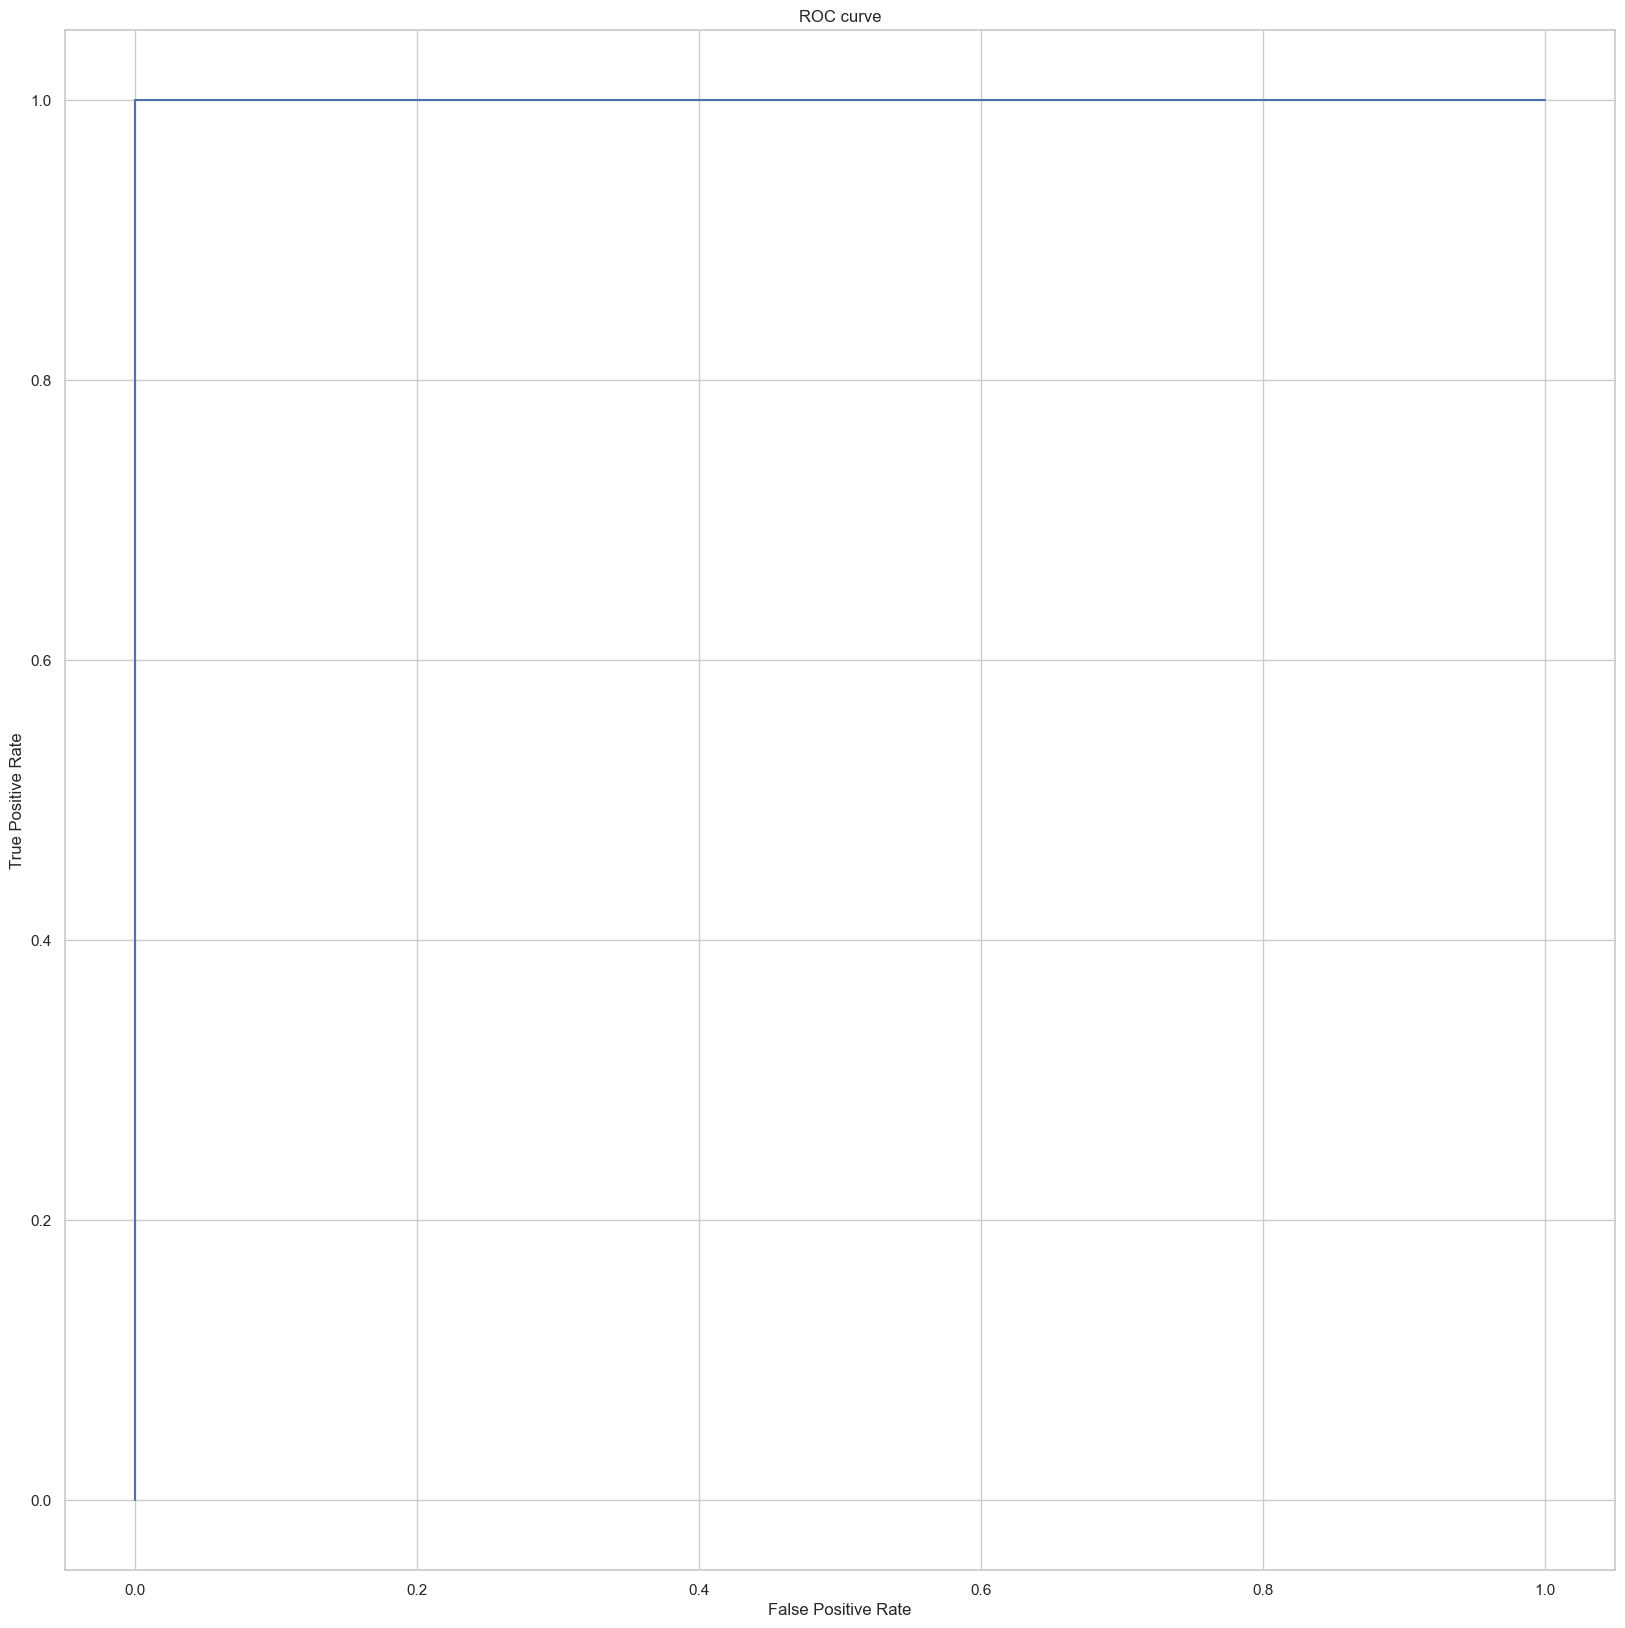

In [205]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)    
y_predicted = model(X_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()